In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import glob
import os
import peakutils
import datetime
import warnings
from jupyterthemes import jtplot

In [3]:
from ali.ali_sw import *
from xps.xps_sw import *
from xps.xps_import import *
from xps.xps_bg import *
from xps.xps_analysis import *

In [4]:
jtplot.style('default', grid=False)

# Calculate amount of C and O for two deposition parameters

## $p_{Ar}$ = 800 mbar
C$_{FBI}$ = 1µM

3 runs:
 - 20 pulses
 - 40 pulses
 - 120 pulses

In [5]:
path = '/Users/pabloherrero/sabat/xps_spectra/'
file800_20 = path + '2019_10_10_FBI_Au_mica/20191010_FBI_20puls_1uM_Au.xy'
file800_40 = path + '2019_10_10_FBI_Au_mica/20191010_FBI_40puls_1uM_Au.xy'
# file800_120 = path + '2019_10_10_FBI_Au_mica/20191010_FBI_20puls_1uM_Au'
file800_ref = path + '2019_10_10_AcN_Au_mica/20191010_Au_111_clean.xy'

In [6]:
path = '/Users/pabloherrero/sabat/xps_spectra/2019_10_10_*/*.xy'
files = glob.glob(path, recursive=True)
files

['/Users/pabloherrero/sabat/xps_spectra/2019_10_10_AcN_Au_mica/20191010_Au_111_clean.xy',
 '/Users/pabloherrero/sabat/xps_spectra/2019_10_10_FBI_Au_mica/20191010_FBI_20puls_1uM_Au.xy',
 '/Users/pabloherrero/sabat/xps_spectra/2019_10_10_FBI_Au_mica/20191010_FBI_40puls_1uM_Au.xy']

### Import data

In [7]:
names = ['clean', '20pulses', '40pulses']
experiments = [xps_data_import(path=f, name=n) for f,n in zip(files, names)]
experiments[0].name

'clean'

In [8]:
dfref = XPSImport(file800_ref).import_xps_df()
df20 = XPSImport(file800_20).import_xps_df()
df40 = XPSImport(file800_40).import_xps_df()

### Scale plots to reference

In [9]:
dfref

range          overview_             C_1s            N_1s            O_1s  \
properties        energy    counts energy   counts energy   counts energy   
0           1.200000e+03  146462.5  295.0  38247.6  405.0  75826.0  542.0   
1           1.199000e+03  146462.5  294.9  38203.2  404.9  76556.4  541.9   
2           1.198000e+03  144912.5  294.8  38102.0  404.8  76269.6  541.8   
3           1.197000e+03  145705.0  294.7  38162.8  404.7  76357.2  541.7   
4           1.196000e+03  146175.0  294.6  38407.2  404.6  76326.0  541.6   
5           1.195000e+03  144002.5  294.5  38306.0  404.5  76227.6  541.5   
6           1.194000e+03  142520.0  294.4  38207.2  404.4  76319.2  541.4   
7           1.193000e+03  143270.0  294.3  38199.6  404.3  76340.4  541.3   
8           1.192000e+03  142430.0  294.2  38083.6  404.2  76189.6  541.2   
9           1.191000e+03  142537.5  294.1  38261.2  404.1  76368.8  541.1   
10          1.190000e+03  140627.5  294.0  38210.0  404.0  76036.8  541.0   
11          1.189000e+03  141450.0  293.9  38006.4  403.9  76501.2  540.9   
12          1.188000e+03  139217.5  293.8  38238.0  403.8  76516.4  540.8   
13          1.187000e+03  139610.0  293.7  38210.4  403.7  76510.8  540.7   
14          1.186000e+03  138237.5  293.6  38189.2  403.6  76738.8  540.6   
15          1.185000e+03  139005.0  293.5  38109.6  403.5  76256.4  540.5   
16          1.184000e+03  137505.0  293.4  38205.2  403.4  76583.2  540.4   
17          1.183000e+03  136815.0  293.3  38403.2  403.3  76450.4  540.3   
18          1.182000e+03  137050.0  293.2  38215.6  403.2  76433.6  540.2   
19          1.181000e+03  137330.0  293.1  38258.4  403.1  76232.4  540.1   
20          1.180000e+03  135517.5  293.0  38165.2  403.0  76344.8  540.0   
21          1.179000e+03  134955.0  292.9  38044.8  402.9  76610.8  539.9   
22          1.178000e+03  134465.0  292.8  38054.0  402.8  76450.8  539.8   
23          1.177000e+03  134577.5  292.7  38171.2  402.7  76554.8  539.7   
24          1.176000e+03  133510.0  292.6  38096.8  402.6  76338.0  539.6   
25          1.175000e+03  133180.0  292.5  38208.4  402.5  76531.2  539.5   
26          1.174000e+03  132887.5  292.4  38134.8  402.4  75947.2  539.4   
27          1.173000e+03  133045.0  292.3  38254.4  402.3  76696.0  539.3   
28          1.172000e+03  132775.0  292.2  38150.8  402.2  76725.6  539.2   
29          1.171000e+03  132515.0  292.1  38200.8  402.1  76468.0  539.1   
...                  ...       ...    ...      ...    ...      ...    ...   
1175        2.500000e+01   14467.5    NaN      NaN    NaN      NaN    NaN   
1176        2.400000e+01   14785.0    NaN      NaN    NaN      NaN    NaN   
1177        2.300000e+01   14712.5    NaN      NaN    NaN      NaN    NaN   
1178        2.200000e+01   15400.0    NaN      NaN    NaN      NaN    NaN   
1179        2.100000e+01   16007.5    NaN      NaN    NaN      NaN    NaN   
1180        2.000000e+01   16452.5    NaN      NaN    NaN      NaN    NaN   
1181        1.900000e+01   17025.0    NaN      NaN    NaN      NaN    NaN   
1182        1.800000e+01   17327.5    NaN      NaN    NaN      NaN    NaN   
1183        1.700000e+01   17732.5    NaN      NaN    NaN      NaN    NaN   
1184        1.600000e+01   17787.5    NaN      NaN    NaN      NaN    NaN   
1185        1.500000e+01   17302.5    NaN      NaN    NaN      NaN    NaN   
1186        1.400000e+01   16960.0    NaN      NaN    NaN      NaN    NaN   
1187        1.300000e+01   16757.5    NaN      NaN    NaN      NaN    NaN   
1188        1.200000e+01   16162.5    NaN      NaN    NaN      NaN    NaN   
1189        1.100000e+01   15680.0    NaN      NaN    NaN      NaN    NaN   
1190        1.000000e+01   16260.0    NaN      NaN    NaN      NaN    NaN   
1191        9.000000e+00   19280.0    NaN      NaN    NaN      NaN    NaN   
1192        8.000000e+00   28265.0    NaN      NaN    NaN      NaN    NaN   
1193        7.000000e+00   40890.0    NaN      NaN    NaN      NaN    NaN

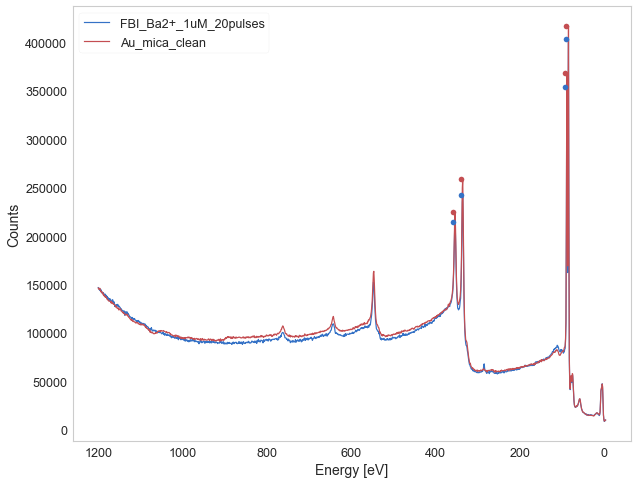

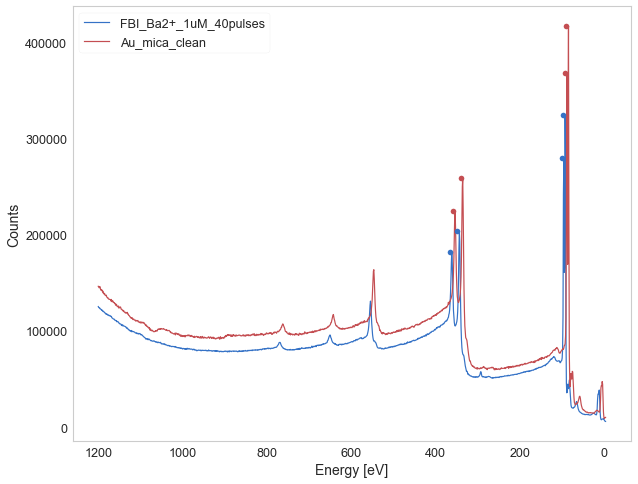

In [10]:
scale20 = scale_and_plot_spectra(df = df20.overview_, dfRef = dfref.overview_, lb = ['FBI_Ba2+_1uM_20pulses', 'Au_mica_clean'])
scale40 = scale_and_plot_spectra(df = df40.overview_, dfRef = dfref.overview_, lb = ['FBI_Ba2+_1uM_40pulses', 'Au_mica_clean'])


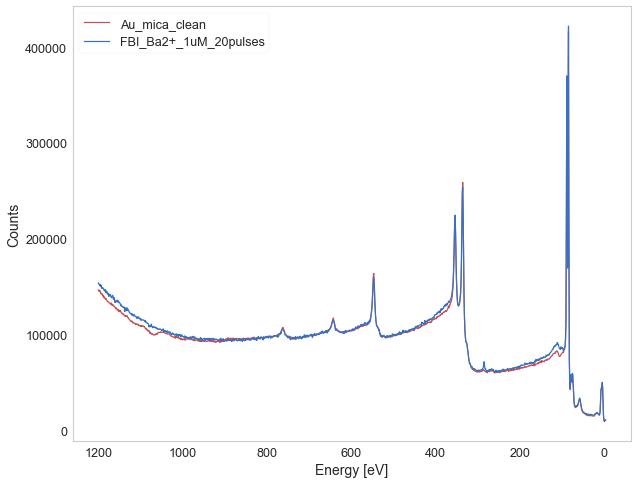

In [11]:
plt.figure(figsize=(10,8))
plt.plot(dfref.overview_.energy, dfref.overview_.counts, '-r', label='Au_mica_clean')
plt.plot(df20.overview_.energy, df20.overview_.counts*scale20, '-b', label='FBI_Ba2+_1uM_20pulses')

plt.xlabel('Energy [eV]', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.legend()
plt.gca().invert_xaxis()
# plt.xlim(400,200)

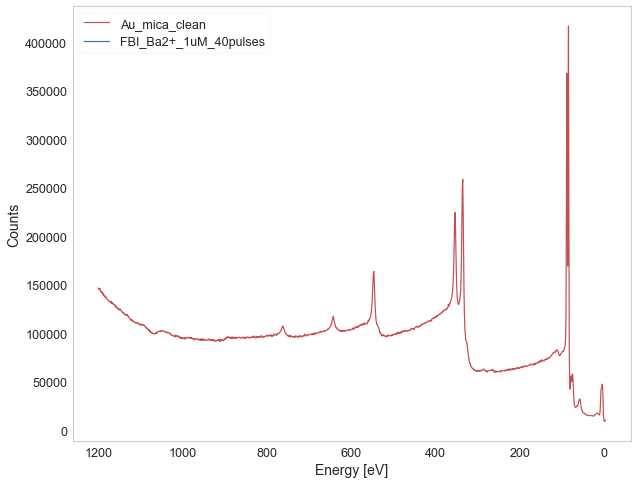

In [12]:
plt.figure(figsize=(10,8))
plt.plot(dfref.overview_.energy, dfref.overview_.counts, '-r', label='Au_mica_clean')
plt.plot(df40.overview_.energy, df40.overview_.counts*scale40, '-b', label='FBI_Ba2+_1uM_40pulses')

plt.xlabel('Energy [eV]', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.legend()
plt.gca().invert_xaxis()
# plt.xlim(400,400)

In [13]:
def scale_df(df : pd.DataFrame, scale_factor):
    
    names = list(df.columns.levels[0])
    dfnew = pd.DataFrame()

    frames = []
    for n in names:
        x = df[n].counts.apply(lambda c : c * scale_factor)
        frames.append( pd.DataFrame([df[n].energy, x]).T )
    dfnew = pd.concat(frames, axis=1)

    mi = pd.MultiIndex.from_product([names, np.array(['energy', 'counts'])])
    mi.to_frame()
    dfnew.columns = mi
    return dfnew

In [14]:
df20 = scale_counts(df20, scale20)
df40 = scale_counts(df40, scale40)

NameError: name 'scale_counts' is not defined

### Plot individual elements

In [ ]:
names = list(dfref.columns.levels[0])

fig, ax = plt.subplots(len(names)-1)

for j, a in enumerate(names[:-1]):
    ax[j].set_title(a, fontsize=14)
    plot_xps_element_spectra(dfref[a], df20[a], flag_smooth=True, ax = ax[j])
    ymax = ax[j].get_ylim()[1]
    ax[j].set_ylim(0, ymax*1.2)
fig.set_figheight(len(names) * 8)

#### df40

In [ ]:
names = list(dfref.columns.levels[0])

fig, ax = plt.subplots(len(names)-1)

for j, a in enumerate(names[:-1]):
    ax[j].set_title(a, fontsize=14)
    plot_xps_element_spectra(dfref[a], df40[a], flag_smooth=True, ax = ax[j])
    ymax = ax[j].get_ylim()[1]
    ax[j].set_ylim(0, ymax*1.2)
fig.set_figheight(len(names) * 8)

### Background subtraction

#### df20

In [ ]:
[x.name for x in experiments]

In [16]:
region = 'C_1s'

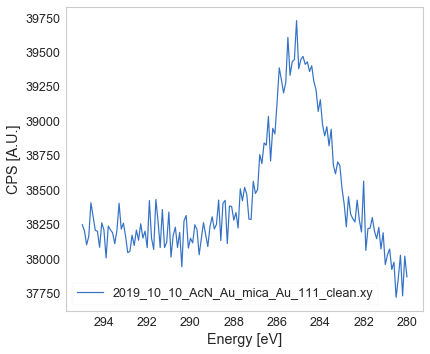

In [17]:
plot_region(experiments[0], region)

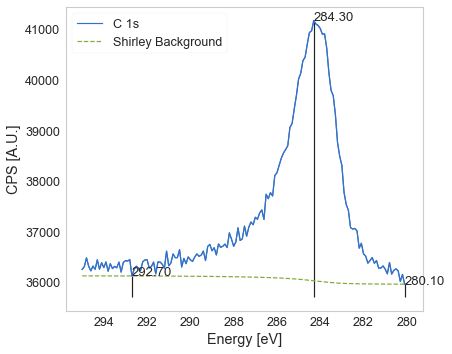

In [19]:
y20 = subtract_shirley_bg(experiments[1], 'C_1s', maxit = 15);

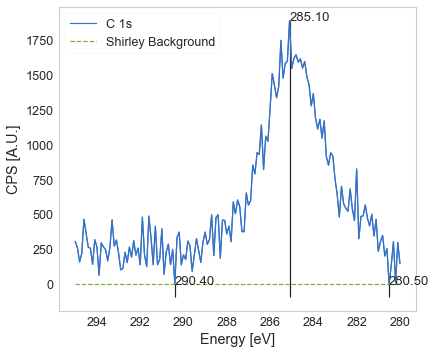

In [20]:
yref = subtract_shirley_bg(experiments[0], 'C_1s')

In [ ]:
from scipy.ndimage.filters import gaussian_filter1d
x = df20.C_1s.dropna().energy.values
y20 = gaussian_filter1d(y20, sigma = 2)
yref = gaussian_filter1d(yref, sigma = 2)

step = x[0] - x[1]
area_ratio = np.trapz(y20, dx = step) / np.trapz(yref, dx = step)
print(area_ratio)

plt.plot(x, y20, label='ALI deposition 40 pulses, 800 mbar, 1 uM')
plt.plot(x, yref, label = 'Reference clean Au (788)')
cosmetics_plot()


#### df40

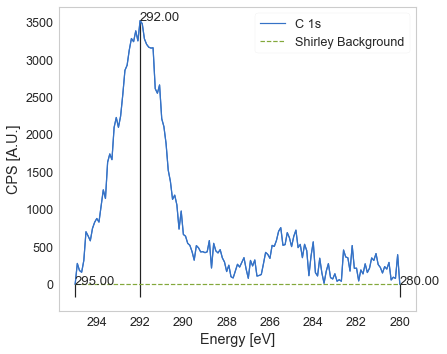

In [26]:
y = subtract_shirley_bg(experiments[2], region, maxit = 15);

In [ ]:
yref = subtract_shirley_bg(dfref.C_1s)

### Results

1.4587387089540977


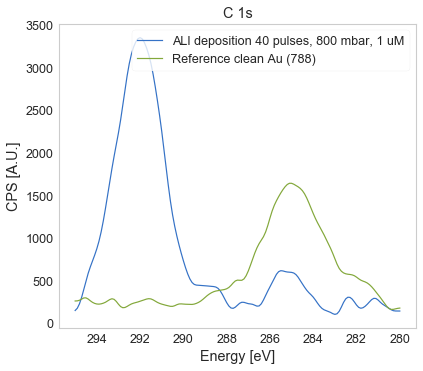

In [27]:
from scipy.ndimage.filters import gaussian_filter1d
x = experiments[0].dfx.C_1s.dropna().energy.values
y = gaussian_filter1d(y.dfx.C_1s.dropna().counts, sigma = 2)
yref = gaussian_filter1d(yref.dfx.C_1s.dropna().counts, sigma = 2)

step = x[0] - x[1]
area_ratio = np.trapz(y, dx = step) / np.trapz(yref, dx = step)
print(area_ratio)

plt.plot(x, y, label='ALI deposition 40 pulses, 800 mbar, 1 uM')
plt.plot(x, yref, label = 'Reference clean Au (788)')
plt.title('C 1s')
cosmetics_plot()


# Dropcasting test

## Import data

In [87]:
path = '/Users/pabloherrero/sabat/xps_spectra/2019_10_[2,3]*Au_crystal*/*.xy'
files = glob.glob(path, recursive=True)
files.sort()
files

['/Users/pabloherrero/sabat/xps_spectra/2019_10_28_Au_crystal_clean/20191028_Au(788)_clean.xy',
 '/Users/pabloherrero/sabat/xps_spectra/2019_10_28_FBI_dropcast_Au_crystal/20191028_FBI_dropcast_1mM_Au(788).xy',
 '/Users/pabloherrero/sabat/xps_spectra/2019_10_29_Au_crystal_sputter_1500ev/20191029_Au(788)_sputter_1500ev.xy',
 '/Users/pabloherrero/sabat/xps_spectra/2019_10_30_Au_crystal_sputter_2kev/20191030_FBI_Ba_Au(788)_sputter_2kev.xy',
 '/Users/pabloherrero/sabat/xps_spectra/2019_10_31_Au_crystal_sputter_2kev/20191031_FBI_Ba_Au(788)_2ndSputter_2kev.xy']

In [88]:
label = ['Clean Au substrate', 'Dropcast FBI-region++ 1 mM', 'Sputter 1: 1.5 keV, 10 min', 'Sputter 2: 2 keV, 1h', 'Sputter 3: 2 keV, 2h']

experiments = [xps_data_import(path=f, label=l) for f,l in zip(files, label)]
experiments[0].label

'Clean Au substrate'

In [89]:
names = ['clean', 'dropcast', 'sput15min', 'sput1h', 'sput2h']
label = ['Clean Au substrate', 'Dropcast FBI-region++ 1 mM', 'Sputter 1: 1.5 keV, 10 min', 'Sputter 2: 2 keV, 1h', 'Sputter 3: 2 keV, 2h']

experiments = [xps_data_import(path=f, name=n, label=l) for f,n,l in zip(files, names, label)]
experiments[0].label, experiments[0].name

('Clean Au substrate', 'clean')

## Plot all overviews

In [90]:
region = 'overview'

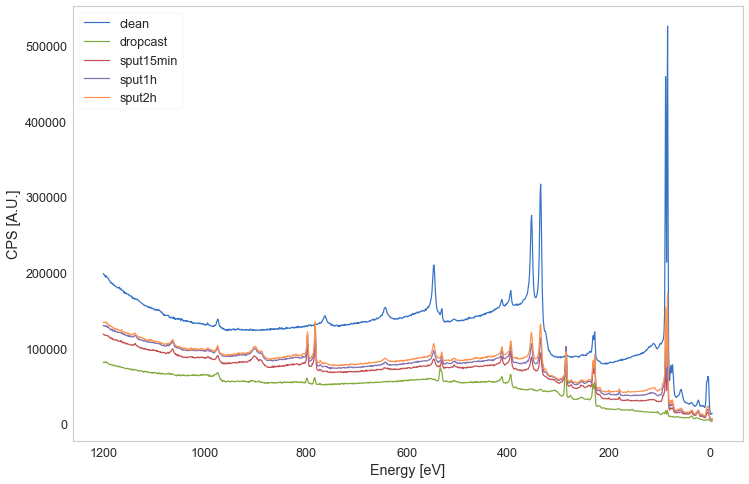

In [91]:
fig = plt.figure(figsize=(12, 8))
for xp in experiments:
    plot_region(xp, region, lb=xp.name)
#     print(xp.name)

In [166]:
def find_and_plot_peaks(df : pd.DataFrame, thres : float = 0.5, min_d : int = 10, col : str = 'r', ax = None):
    leny = len(df.index)
    peaks =  peakutils.indexes(df.counts.values, thres=thres, min_dist=min_d)
    x_peaks = leny - df.index[peaks]
    y_peaks = df.counts.values[peaks]
    ax.plot(x_peaks, y_peaks, col+'o', label='Peaks at thres = %.1f' %thres)

    return peaks

def scale_and_plot_spectra(xp : XPS_experiment, xpRef : XPS_experiment, region : str = 'overview_', lb : tuple = None) -> float:
    """Plot two spectra and compute average count ratio between main peaks for scaling
        Input:
        -----------------
        df: pd.DataFrame
            DataFrame containing the spectrum region to scale UP
        dfRef: pd.DataFrame
            Reference DataFrame to compare to
        lb : tuple
            Labels for legend
        thres : float
            Peak-finding count threshold, shouldn't be too low
        min_d : int
            Minimum separation between peaks
        mode : str
            Compute scale factor as average ('av') or maximum ('max') of peak ratios
        Output:
        ------------------
        normAv : float
            Scale factor computed as the average ratio between peak heights. Should be > 1,
            otherwise the reference spectrum has weaker intensity than the one intended to scale up
            """
    from peakutils import indexes, baseline
    fig, ax = plt.subplots(1, 2, figsize=(16, 8))
    if lb == None: lb = (xp.name, xpRef.name)
    df, dfRef = xp.dfx[region].dropna(), xpRef.dfx[region].dropna()
    if np.max(df.counts) > np.max(dfRef.counts): print("Warning: spectrum to scale is more intense than reference spectrum")
        
    ax[0].plot(df.energy, df.counts, '-b', label=lb[0])
    ax[0].plot(dfRef.energy, dfRef.counts, '-r', label=lb[1] + ' (ref.)')
    
    indmax = indexes(dfRef.counts.values, thres=0.99)[0] # Get only highest peak
    indmin = np.argmin(dfRef.counts[indmax : indmax + 20]) # Get absolute minimum in near neighbourhood
    ax[0].axhline(dfRef.counts[indmax], color='k', ls = '--')
    ax[0].axhline(dfRef.counts[indmin], color='k', ls = '--')
    ax[0].axvline(dfRef.energy[indmax], color='k', ls = '--')
    
    # Find and plot baselines
    bl = baseline(df.counts, deg=5)
    blr = baseline(dfRef.counts, deg=5)
    ax[0].plot(df.energy, bl, '--b', label='Baseline of' + lb[0])
    ax[0].plot(dfRef.energy, blr, '--r', label='Baseline of' + lb[1])    
    cosmetics_plot(ax = ax[0])
    ax[0].set_title('Baseline and peak')

    yRef = dfRef.counts - blr
    y = df.counts - bl
    # Compute normalization factor
    norm  = ( yRef[indmax] - yRef[indmin] ) / ( y[indmax] - y[indmin] ) 

    y_scale = y * norm
    
    ax[1].plot(df.energy, y_scale, '-b', label=lb[0])
    ax[1].plot(dfRef.energy, yRef , '-r', label=lb[1]+ ' (ref.)')
    cosmetics_plot(ax = ax[1])
    ax[1].set_title('Scaling result')
    return y_scale, norm, indmax

/Users/pabloherrero/anaconda3/envs/IC-3.7-2018-11-14/lib/python3.7/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  return getattr(obj, method)(*args, **kwds)


(200, 0)

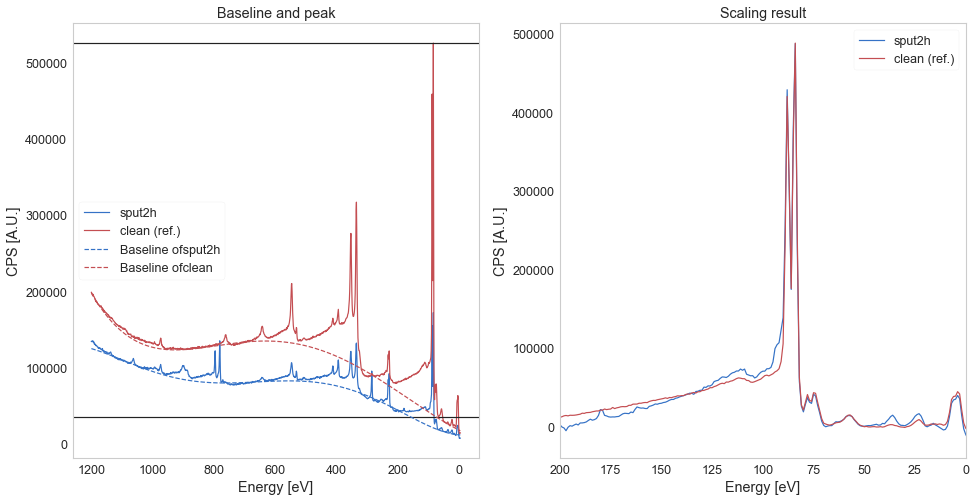

In [167]:
region = 'overview'
y_sc, scale_av, indmax = scale_and_plot_spectra(xp = experiments[4], xpRef=experiments[0], region=region, lb=(experiments[4].name, experiments[0].name), )
plt.xlim(200,0)
# scale_av, scale, pe, pRef= scale_and_plot_spectra(experiments[2].dfx.overview, experiments[1].dfx.overview, (experiments[0].name, experiments[1].name), thres=0.5, min_d=3)

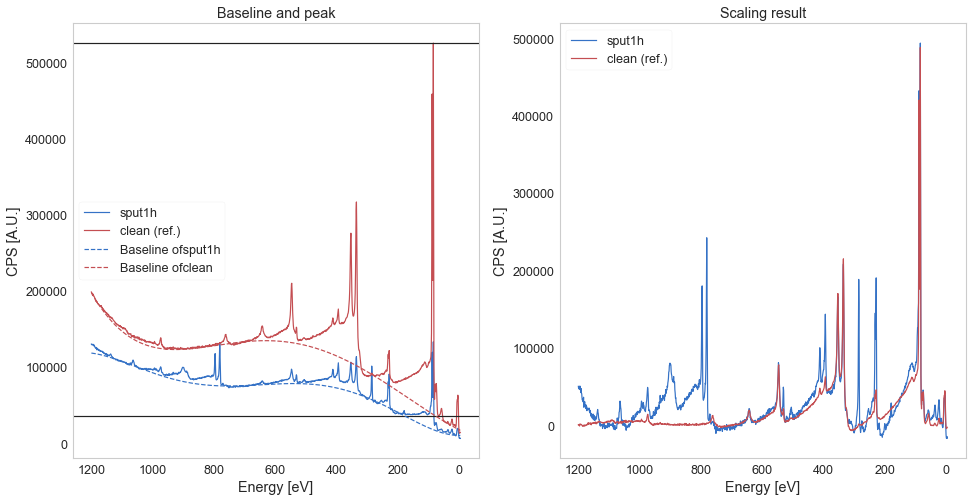

In [168]:
region = 'overview'
y_sc, scale_av, indmax = scale_and_plot_spectra(xp = experiments[3], xpRef=experiments[0], region=region, lb=(experiments[3].name, experiments[0].name), )
# plt.xlim(200,50)

In [135]:
def normalise_dfx(xp : XPS_experiment, inplace : bool = False):
    """Normalise spectrum counts to maximum peak at index position indmax"""
    from peakutils import indexes
    names = list(xp.dfx.columns.levels[0])
    dfnew = pd.DataFrame()

    frames = []
    for n in names:
        y =  xp.dfx[n].dropna().counts
        ynorm = y.apply(lambda c : c / np.max(y))

        frames.append( pd.DataFrame([xp.dfx[n].energy, ynorm]).T )
    dfnew = pd.concat(frames, axis=1)

    mi = pd.MultiIndex.from_product([names, np.array(['energy', 'counts'])])
    mi.to_frame()
    dfnew.columns = mi

    if inplace:
        xp.dfx = dfnew
        return xp
    else:
        xpNew = deepcopy(xp)
        xpNew.dfx = dfnew
    return xpNew

1.0


(200, 0)

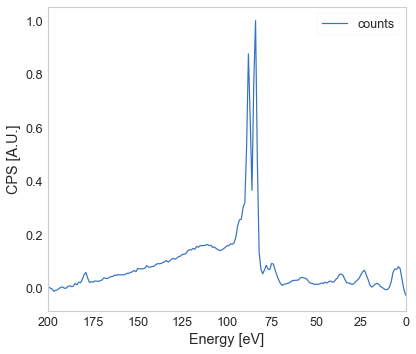

In [134]:
x = experiments[3].dfx[region].energy
print(np.max(y_sc))
y_sc /= y_sc[indmax]
assert y_sc[indmax] == 1, "Incorrect normalization"
plt.plot(x, y_sc)
cosmetics_plot()
plt.xlim(200,0)

In [60]:
from peakutils import indexes, baseline
# ind = indexes(y, thres=0.5)
# bl = baseline(y1 )

In [92]:
def test_scale_and_plot_spectra():
    """If peaks are shifted wrt each other, then ratio_scaled_peaks is not exactly 1 but should be close enough"""
    pathRef = '/Users/pabloherrero/sabat/xps_spectra/2019_10_28_Au_crystal_clean/20191028_Au(788)_clean.xy'
    path =  '/Users/pabloherrero/sabat/xps_spectra/2019_10_31_Au_crystal_sputter_2kev/20191031_FBI_Ba_Au(788)_2ndSputter_2kev.xy'
    xp = xps_data_import(path=path)
    xpRef = xps_data_import(path=pathRef)
    region = 'overview'
    y_sc, scale_av, indmax = scale_and_plot_spectra(xp = xp, xpRef=xpRef, region=region, lb=('xp', 'ref'))
    ratio_scaled_peaks = xpRef.dfx[region].counts[indmax] / y_sc[indmax]

    assert round(ratio_scaled_peaks) == 1, "Peak heights do not coincide"

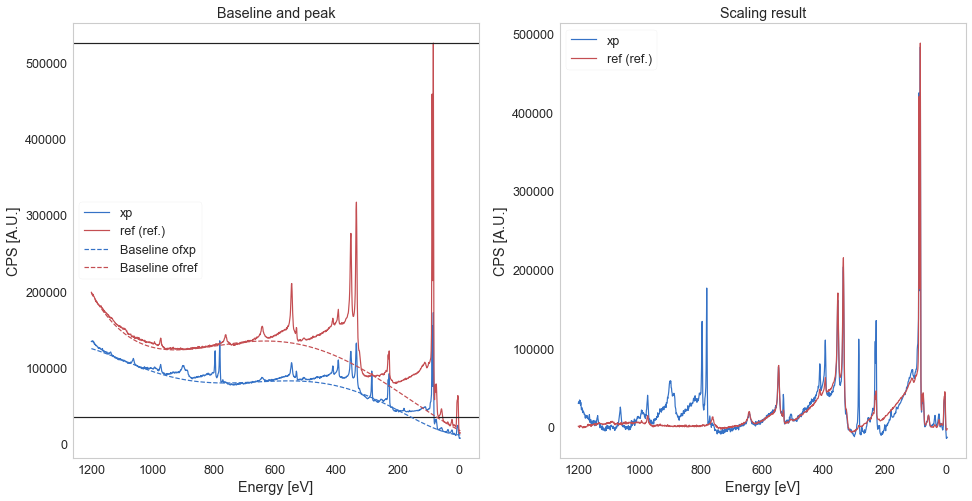

In [138]:
pathRef = '/Users/pabloherrero/sabat/xps_spectra/2019_10_28_Au_crystal_clean/20191028_Au(788)_clean.xy'
path =  '/Users/pabloherrero/sabat/xps_spectra/2019_10_31_Au_crystal_sputter_2kev/20191031_FBI_Ba_Au(788)_2ndSputter_2kev.xy'
xp = xps_data_import(path=path)
xpRef = xps_data_import(path=pathRef)
def test_normalise_dfx():
    region = 'overview'
    y_sc, scale_av, indmax = scale_and_plot_spectra(xp = xp, xpRef=xpRef, region=region, lb=('xp', 'ref'))
    xp_norm = normalise_dfx(xp, indmax)
    y_norm = xp_norm.dfx['overview'].counts
    assert np.max(y_norm) == 1,  "Incorrect normalization"
test_normalise_dfx()

6.183701109936575


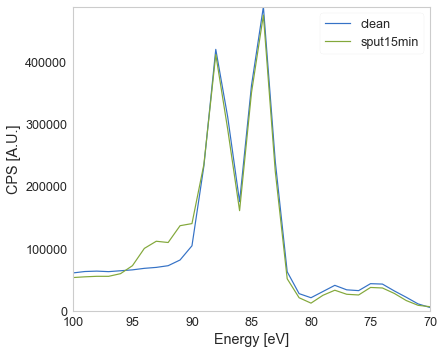

In [94]:
from peakutils import indexes, baseline
indmax = indexes(experiments[0].dfx[region].counts.values, thres=0.99)[0] # Get only highest peak

x = experiments[0].dfx[region].energy
x1 = experiments[2].dfx[region].energy
y = experiments[0].dfx[region].counts
y1 = experiments[2].dfx[region].counts
bl = baseline(y1 )
br = baseline(y)
x[1116], x[1120]
scale = ( y[1116] - y[1120] ) / ( y1[1116] - y1[1120] )
# y1 -= y1[1120]
y1 -= bl
y1 *= scale

y -= br
print(scale)
plt.plot(x, y, label=experiments[0].name)
plt.plot(x1, y1, label=experiments[2].name)
plt.xlim(70, 100)
plt.ylim(0, y[1116])
cosmetics_plot()

In [78]:
y1[1116]/y[1116], scale, round(0.6)

(0.9726327714792542, 6.183701109936575, 1)

In [107]:
def scale_dfx(xp : XPS_experiment, scale_factor : float, inplace : bool = False):
    """Rescale xp.dfx for comparison with other experiment
    Returns whole XPS_experiment"""
    from peakutils import baseline
    
    names = list(xp.dfx.columns.levels[0])
    dfnew = pd.DataFrame()

    frames = []
    for n in names:
        bl = baseline(xp.dfx[n].dropna().counts)
        ybl = xp.dfx[n].dropna().counts - bl
        ysc = ybl.apply(lambda c : c * scale_factor)
        frames.append( pd.DataFrame([xp.dfx[n].energy, ysc]).T )
    dfnew = pd.concat(frames, axis=1)

    mi = pd.MultiIndex.from_product([names, np.array(['energy', 'counts'])])
    mi.to_frame()
    dfnew.columns = mi

    if inplace:
        xp.dfx = dfnew
        return xp
    else:
        xpNew = deepcopy(xp)
        xpNew.dfx = dfnew
    return xpNew

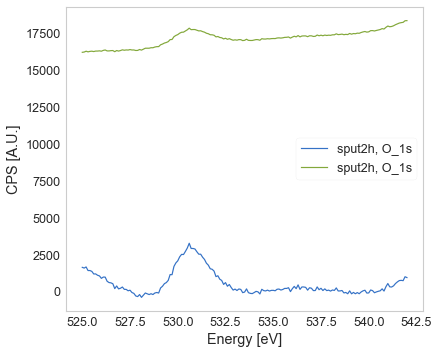

In [112]:
xp_sc = scale_dfx(xp = experiments[4], scale_factor= scale_av)
region = 'O_1s'
plot_region(xp_sc, region)
plot_region(experiments[4], region)
# xp_sc.dfx

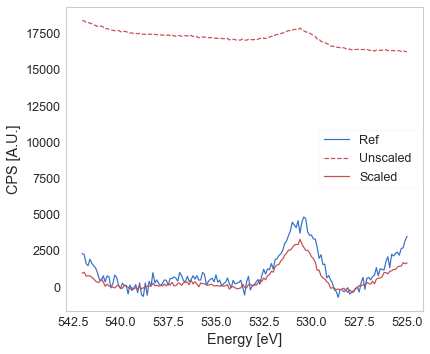

In [53]:
from peakutils import baseline
region = 'O_1s'
dfc = experiments[4].dfx[region].dropna()
dfRf2 = experiments[0].dfx[region]
blc = baseline(dfc.dropna().counts.values)
blr = baseline(dfRf2.dropna().counts.values)


yc_sc = (dfc.counts  - blc) * scale_av
plt.plot(dfRf2.energy.dropna(), dfRf2.counts.dropna() - blr, '-b', label='Ref')
plt.plot(dfc.energy, dfc.counts, '--r', label='Unscaled')
plt.plot(dfc.energy, yc_sc, '-r', label='Scaled')
cosmetics_plot()

In [51]:
dfRf2.counts.dropna() - blr

0      2291.892141
1      2223.882558
2      1605.730682
3      1453.474571
4      1905.152281
5      1621.801870
6      1440.461394
7      1295.168911
8       937.962477
9       470.880149
10      431.959985
11      755.240042
12      337.758376
13      751.553045
14      675.662105
15      -75.876387
16      205.975627
17      802.256204
18      643.003400
19       92.255272
20     -134.950122
21      243.425274
22       87.419518
23      108.070667
24     -496.583224
25      126.495905
26     -254.653892
27      -86.994555
28      148.511970
29     -409.096258
          ...     
141    -396.039916
142    -363.490162
143    -163.716664
144      -5.681364
145    -364.346206
146     261.326867
147     645.375913
148    -174.161012
149     578.754149
150     648.159454
151     471.092959
152     705.592721
153     790.696798
154    1323.443246
155     763.870122
156    1246.015484
157    1201.917388
158    1147.613892
159    1733.143051
160    2073.542925
161    1310.851568
162    2245.

In [89]:
np.where(x == 80)
( y[1116] - y[1100] ),( y1[1116] - y1[1100] )

(421247.5, 4980.0)

In [143]:
x[np.argmin(y[indmax: indmax + 100])], x[indmax]

(296.0, 353.0)

In [46]:
np.average(scale.dropna())

1.455221855402896

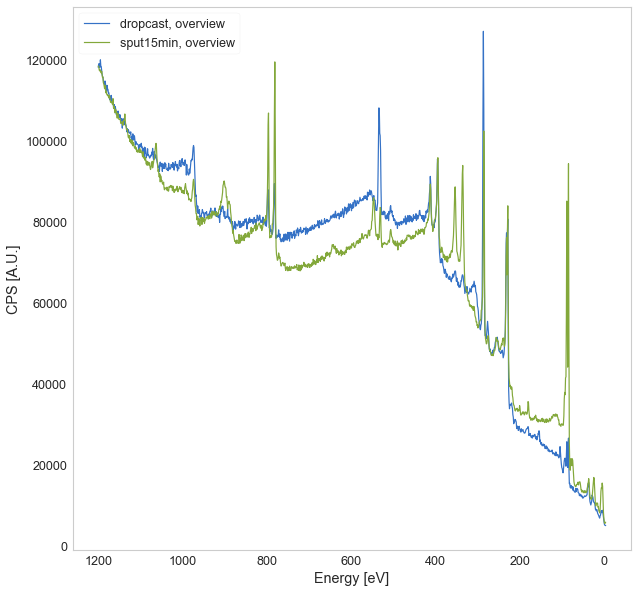

In [53]:
scale1 = scale_dfx(experiments[1], scale_factor=scale_av)
plt.figure(figsize=(10,10))
plot_region(scale1, region)
plot_region(experiments[2], region)
cosmetics_plot()

## Scale to reference

In [9]:
file_clean = path + '2019_10_28_Au_crystal_clean/20191028_Au(788)_clean.xy'
file_dropcast = path + '2019_10_28_FBI_dropcast_Au_crystal/20191028_FBI_dropcast_1mM_Au(788).xy'
dfclean = XPSImport(file_clean).import_xps_df()
dfdrop = XPSImport(file_dropcast).import_xps_df()
dfclean = reverse_energy_scale(dfclean, file_clean)

NameError: name 'path' is not defined

In [ ]:
dfclean

In [ ]:
dfdrop

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(dfclean.overview.energy, dfclean.overview.counts, '-', label='Overview clean Au(788)')
plt.plot(dfdrop.overview.energy, dfdrop.overview.counts, '-', label='Overview Dropcast FBI-Ba++ 1 mM')

find_and_plot_peaks(df=dfdrop.overview, thres=0.9)
cosmetics_plot()

In [ ]:
xref = np.array(dfclean.overview.energy[ (dfclean.overview.energy > 200) & (dfclean.overview.energy < 250)])
yref = np.array(dfclean.overview.counts[ (dfclean.overview.energy > 200) & (dfclean.overview.energy < 250)])

plt.plot(xref, yref, label='Reference (clean) Mo peak')

x = np.array(dfdrop.overview.energy[ (dfdrop.overview.energy > 200) & (dfdrop.overview.energy < 250)])
y = np.array(dfdrop.overview.counts[ (dfdrop.overview.energy > 200) & (dfdrop.overview.energy < 250)])
plt.plot(x, y, label='Dropcasting Mo')

cosmetics_plot()
ind = peakutils.indexes(y, thres=0.9)[0]
ind2 = peakutils.indexes(yref, thres=0.9)[0]
scale_factor = yref[ind2] / y[ind]
scale_factor

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(dfclean.overview.energy, dfclean.overview.counts, '-', label='Overview reference clean Au(788) ')
plt.plot(dfdrop.overview.energy, dfdrop.overview.counts*scale_factor, '-', label='Dropcasting FBI (scaled up)')
cosmetics_plot()

In [10]:
dfdrop = scale_df(dfdrop, scale_factor=scale_factor)

NameError: name 'scale_df' is not defined

## Find Barium abundance

In [38]:
region = 'Ba_3d'

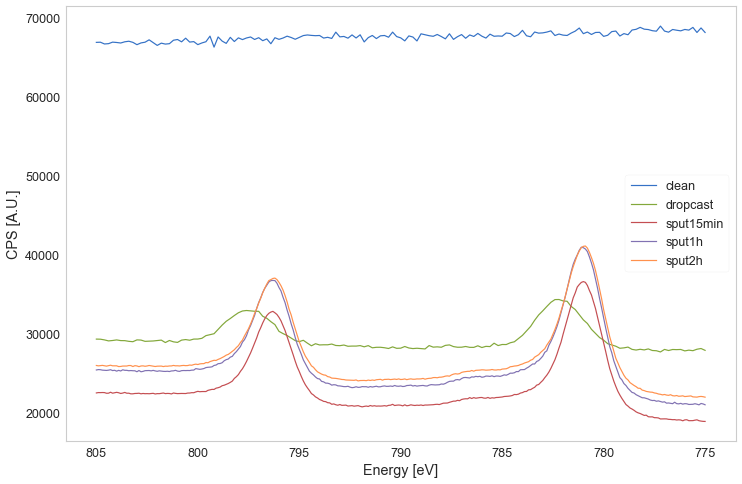

In [39]:
fig = plt.figure(figsize=(12, 8))
for xp in experiments:
    plot_region(xp, region, lb=xp.name)

Text(0.5, 1.0, 'Ba 3d region')

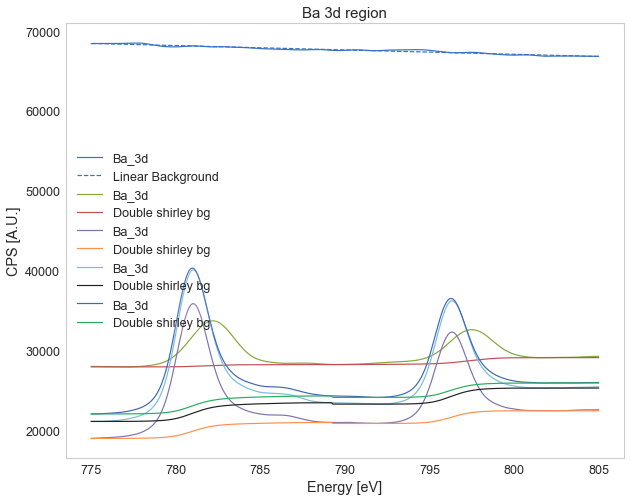

In [42]:
fig = plt.figure(figsize=(10, 8))
bg_exp = []
for j, xp in enumerate(experiments):
    xp_smooth = gaussian_smooth(xp, region)
    if xp.name == 'clean':
        xp_bg = subtract_linear_bg(xp_smooth, region)
    else:
        xp_bg = subtract_double_shirley(xp_smooth, region, 789.2)
    bg_exp.append(xp_bg)
cosmetics_plot()
plt.legend(loc='center left', framealpha=0.1)
plt.title('Ba 3d region', fontsize = 15)

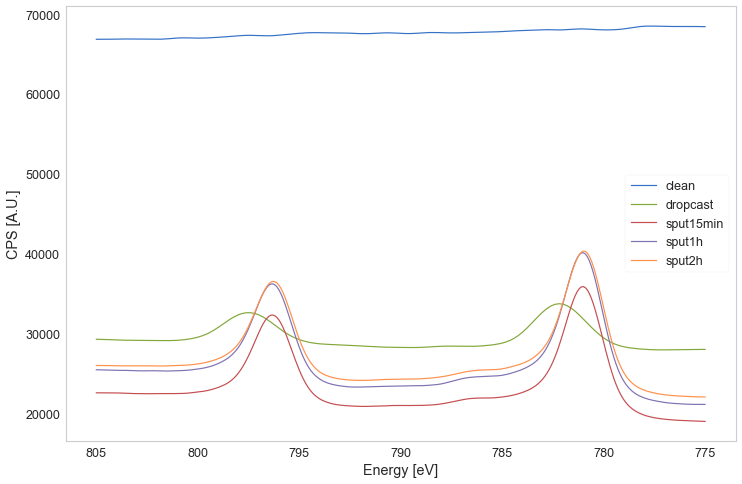

In [48]:
fig = plt.figure(figsize=(12, 8))
for xp in experiments:
    plot_region(xp, region, lb=xp.name)

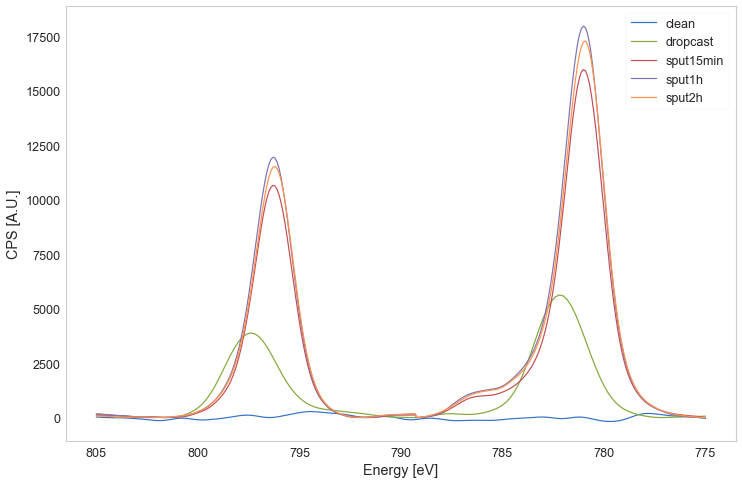

In [43]:
fig = plt.figure(figsize=(12, 8))
for xp in bg_exp:
    plot_region(xp, region, lb=xp.name)

## Compare areas

In [68]:
def flexible_integration_limits(xp : XPS_experiment, region : str, doublePeak : float = 0, flag_plot : bool = True) -> list:
    """Autolocate limits for area integration. 
    doublePeak > 0 : second peak on the rhs of the main one
    doublePeak < 0 : second peak on the lhs of the main one
    doublePeak == 0 : no second peak """
    x = xp.dfx[region].dropna().energy
    y = xp.dfx[region].dropna().counts
    plt.plot(x, y, label=xp.name)
    maxidx = abs(y - np.max(y)).idxmin()
    lmidx = abs(y[0:maxidx] - np.min(y[0:maxidx])).idxmin()
    rmidx = abs(y[maxidx:] - np.min(y[maxidx:])).idxmin() #+ maxidx

    if doublePeak < 0:
        maxidx2 = abs(y[:lmidx] - np.max(y[:lmidx])).idxmin()
        lmidx2 = abs(y[:maxidx2] - np.min(y[:maxidx2])).idxmin()
        ind = [maxidx, maxidx2, lmidx2, rmidx]
    elif doublePeak > 0:
        maxidx2 = abs(y[rmidx:] - np.max(y[rmidx:])).idxmin()
        rmidx2 = abs(y[maxidx2:] - np.min(y[maxidx2:])).idxmin()
        ind = [maxidx, maxidx2, lmidx, rmidx2]
    else:
        ind = [maxidx, lmidx, rmidx]

    ybase = plt.ylim()[0]
    for i in ind:
        plt.vlines(x[i], ymin=ybase, ymax=y[i], linestyles='--')
        plt.text(s='%.2f'%x[i], x = x[i], y = y[i])
    cosmetics_plot()
    return ind

In [18]:
def test_flexible_integration_limits():
    ind = flexible_integration_limits(xp.dfx[region], doublePeak=-1)
    cosmetics_plot()
    assert ind[1] < ind[0], "Secondary maximum not on lhs of the main"
    assert ind[2] < ind[1] < ind[3], "Improper ordering of lmidx < maxidx < rmidx"

    x1 = x.reset_index(drop=True)
    y1 = y[::-1].reset_index(drop=True) # Reverse the arrays
    ind = flexible_integration_limits(x = x1, y=y1, doublePeak=1)
    cosmetics_plot()
    ind
    assert ind[1] > ind[0], "Secondary maximum not on rhs of the main"
    assert ind[2] < ind[1] < ind[3], "Improper ordering of lmidx < maxidx < rmidx"

In [81]:
def compare_areas(xp_ref : XPS_experiment, xp_sg : XPS_experiment, region : str, 
                  lmidx : int, rmidx : int, lb : str = None,  ax = None):
    """Returns absolute and relative area in a region xp_sg and w.r.t. xp_ref
    between indices lmidx and rmidx"""
    y_ref = xp_ref.dfx[region].dropna().counts
    y_sg = xp_sg.dfx[region].dropna().counts

    if ax == None: ax = plt.gca()
    x = xp_sg.dfx[region].dropna().energy
    step = x[0] - x[1]

    area = np.trapz(y_sg [ lmidx : rmidx ], dx = step)
    area_rel = area / np.trapz(y_ref [ lmidx : rmidx ], dx = step)

    if lb == None: lb = xp_sg.name
    ax.plot(x, y_sg, '-', label=lb)
    ax.fill_between(x [lmidx : rmidx], y1 = y_sg[lmidx], y2 = y_sg [lmidx : rmidx], alpha=0.3)
    cosmetics_plot()
    return area_rel, area

In [10]:
def inset_rel_areas(area_rel : list, names : list) -> None:
    ax = plt.gca()
    axins = plt.axes([0.65, 0.5, 0.25, 0.3])
    axins.bar(names, area_rel)
    axins.set_ylabel('$A_{exp}/A_{ref}$', fontsize=12)
    axins.tick_params(labelrotation=45)
    ax.legend(loc='upper left')

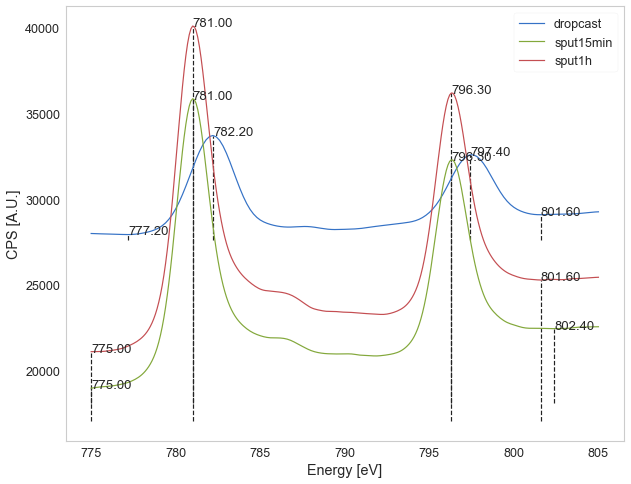

In [72]:
plt.figure(figsize=(10, 8))
ind = []
for j, xp in enumerate(experiments[1:-1]):
    ind.append(flexible_integration_limits(xp, region, doublePeak=-1))
cosmetics_plot()

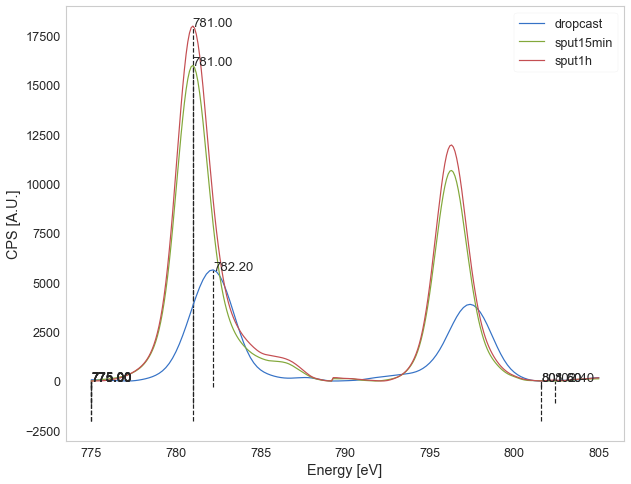

In [73]:
plt.figure(figsize=(10, 8))
ind = []
for j, xp in enumerate(bg_exp[1:-1]):
    ind.append(flexible_integration_limits(xp, region, doublePeak=1))
cosmetics_plot()

In [83]:
ind[0][2:]
ind

[[114, 150, 17, 150], [240, 300, 26, 300], [240, 300, 34, 300]]

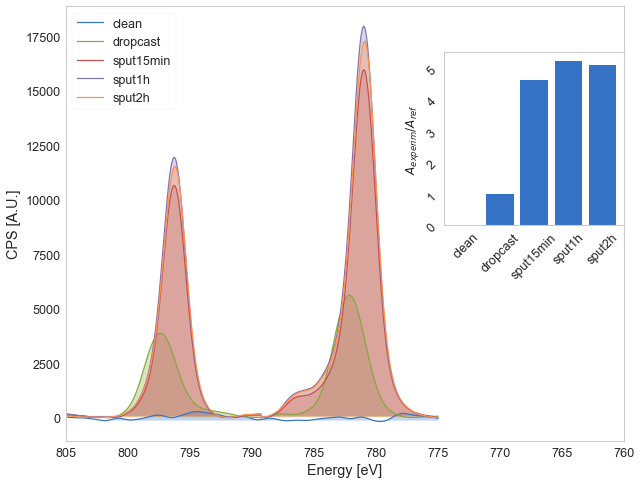

In [84]:
plt.figure(figsize=(10,8))
area_rel, names = [], []
for j,xp in enumerate(bg_exp):
    area = compare_areas(bg_exp[1], xp, region, lmidx=15, rmidx=300)
    area_rel.append(area[0])
    names.append(xp.name)
plt.xlim(805, 760)
inset_rel_areas(area_rel, names)
# cosmetics_plot()

[ 87 240]


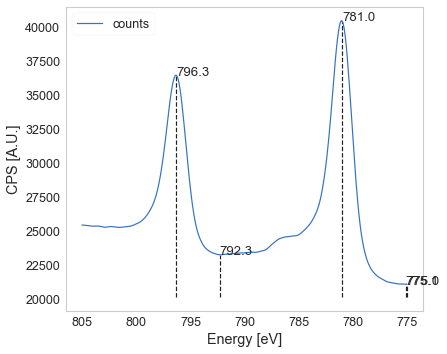

In [221]:
x = xp.dfx[region].dropna().energy
y = xp.dfx[region].dropna().counts
maxidx = abs(y - np.max(y)).idxmin()
lmidx = abs(y[0:maxidx] - np.min(y[0:maxidx])).idxmin()
rmidx = abs(y[maxidx:] - np.min(y[maxidx:])).idxmin() #+ maxidx
plt.plot(x, y)

maxidx2 = indexes(y, thres=0.6, min_dist=5)
print(maxidx2)
ybase = plt.ylim()[0]
for i in [maxidx, lmidx, rmidx, maxidx2[0], lmidx2]:
    plt.vlines(x[i], ymin=ybase, ymax=y[i], linestyles='--')
#     plt.axvline(x[i], ymin=ybase, ymax=y[i], color='k')

    plt.text(s=str(x[i]), x = x[i], y = y[i])
# plt.plot(x[540], y[540], 'go', ms=10)
cosmetics_plot()

In [53]:
area_ba

[(53019.8482020702, 82897.5670621168),
 (48298.573280027005, 75515.76161112564),
 (10686.176823079599, 33416.09189270709),
 (54697.14541138805, 85520.0539723509)]

Text(0.5, 1.0, 'Sputter effect')

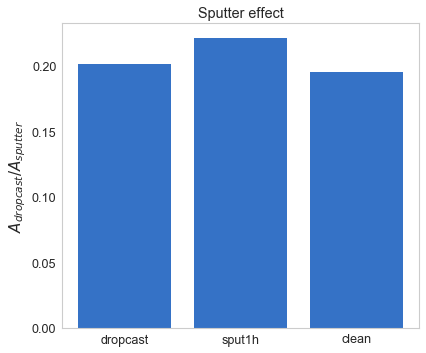

In [59]:
sput_eff = [area_ba[0][0]/area_ba[2][0], area_ba[1][0]/area_ba[2][0], area_ba[3][0]/area_ba[2][0]]
# plt.bar([s.replace('Sputter','') for s in lb[2:]], [1/x for x in sput_eff])
plt.bar([xp.name for xp in experiments[2:]], [1/x for x in sput_eff])
plt.ylabel('$A_{dropcast}/A_{sputter}$', fontsize=15)
plt.title('Sputter effect')

## Voigt fit

In [60]:
[xp.name for xp in experiments]

['sput2h', 'sput15min', 'dropcast', 'sput1h', 'clean']

11.572191639016078


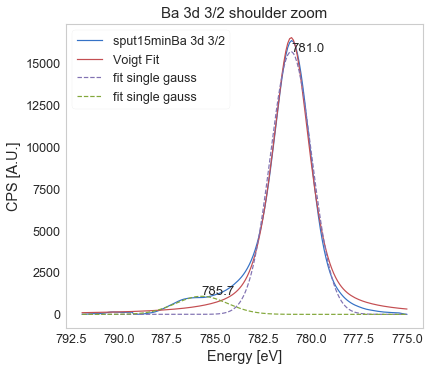

In [350]:
sput1 = experiments[1]
clean = experiments[4]
x = sput1.dfx.Ba_3d.dropna().energy.values

y = sput1.dfx.Ba_3d.dropna().counts.values

from lmfit.models import PseudoVoigtModel, GaussianModel

y = y[ x < 792]
x = np.array(x[ x < 792])
plt.plot(x, y, '-b', label=sput1.name + 'Ba 3d 3/2')

mod = PseudoVoigtModel(prefix='v_')
pars = mod.guess(y, x=x)
pars['v_sigma'].set(value=1)
fitv = mod.fit(y, pars, x=x)
# print(fitv.fit_report(min_correl=0.25))
fitpar = [ fitv.best_values[i] for i in fitv.best_values]
plt.plot(x, fitv.best_fit, '-r', label='Voigt Fit')

step = x[-2] - x[-1]
fitv, covv = curve_fit(gauss, x, y, p0 = [15000, 789, 2])
yfitv = gauss(x, *fitv)
plt.plot(x, yfitv, 'm--', label='fit single gauss')

area_big = np.trapz(yfitv, dx = step)

yp = y[x > 785]
xp = x[x > 785]
fitg, covv = curve_fit(gauss, xp, yp, p0 = [1000, 787, 1])
yfitg = gauss(x, *fitg)
plt.plot(x, yfitg, 'g--', label='fit single gauss')
area_small = np.trapz(yfitg, dx = step)

print(area_big/ area_small)
plt.text(s='%.1f'%fitv[1], x=fitv[1], y=fitv[0]*1.0)
plt.text(s='%.1f'%fitg[1], x=fitg[1], y=fitg[0]*1.1)
plt.title('Ba 3d 3/2 shoulder zoom', fontsize = 15)
plt.legend()
cosmetics_plot()

In [403]:
def compute_area(fit, prefix):
    sigma = fit.best_values[prefix+'sigma']
    amp = fit.best_values[prefix+'amplitude']
    return amp * np.sqrt(np.pi/sigma)

def fit_voigt(xp : XPS_experiment, region : str, pars : list = None, bounds : list = None, ax = None, flag_plot : bool = True):
    """General method for fitting voigt model
    Input
    ----------
    xp : class XPS_experiment
        XPS data
    region : str
        core level name
    pars, bounds : list
        initial guess of the fit parameters and bounds. If unspecified, guessed automatically
    Returns
    -----------
    fitv : lmfit.model
        fit result to Voigt model
    """
    from lmfit.models import PseudoVoigtModel, GaussianModel
    
    x = xp.dfx[region].dropna().energy
    y = xp.dfx[region].dropna().counts
    if ax == None: ax = plt.gca()
    ax.plot(x, y, '-b', label='Data')
    
    mod = PseudoVoigtModel(prefix='v_')
    if pars == None:
        pars = mod.guess(y, x=x)
        pars['v_sigma'].set(value=1) # Usually guessed wrong anyway
    
    fitv = mod.fit(y, pars, x=x)
    
    if flag_plot:
        ax.plot(x, fitv.best_fit, '--', label='Fit to single Voigt')
        ax.legend()
    return fitv

def add_gauss_shoulder(xp : XPS_experiment, region : str, par_g : list, bounds_g: list, 
                       fitv = None, Ng : int = 1, ax = None, flag_plot : bool = True):
    """Add gaussian shoulder to fit
    Input
    ----------
    xp : class XPS_experiment
        XPS data
    region : str
        core level name
    par_g, bounds_g : list
        initial guess of the gauss fit parameters and bounds.
    Returns
    -----------
    fitvg : lmfit.model
        fit result to Voigt + Gaussian model
    """
    from lmfit.models import PseudoVoigtModel, GaussianModel
    
    x = xp.dfx[region].dropna().energy
    y = xp.dfx[region].dropna().counts
    if ax == None : ax = plt.gca()
    ax.plot(x, y, '-b', label='Data')
    
    gauss2 = GaussianModel(prefix='g'+str(Ng)+'_')
    pars = fitv.params
    pars.update(gauss2.make_params())

    for k,p,b in zip(gauss2.param_names, par_g, bounds_g):
        pars[k].set(value=p, min=b[0], max=b[1])
    mod2 = fitv.model + gauss2

    fitvg = mod2.fit(y, pars, x=x)
    # print(fitvg.fit_report(min_correl=.5))
    if flag_plot:
        comps = fitvg.eval_components(x=x)
#         a1, a0 = [compute_area(fitvg, prefix) for prefix in ['g_', 'v_']]

        ax.plot(x, fitvg.best_fit, '-r', label = 'best fit')
#         ax.plot(x, comps['v_'], 'g--', label = 'voigt component @ %.2f \nArea ref. '%fitvg.best_values['v_center'])
        ax.plot(x, comps['g'+str(Ng)+'_'], 'y--', label = '1st gauss component @ %.2f \nArea =  '%(fitvg.best_values['g'+str(Ng)+'_center']))#, a1/a0))
        ax.legend()
    cosmetics_plot()
    return fitvg

def compute_rel_area(df_ref : pd.DataFrame, df_sg : pd.DataFrame,
                            lb : str,  ax = None):

    y_ref = df_ref.counts
    y_sg = df_sg.counts

    if ax == None: ax = plt.gca()

    step = df_ref.energy[0] - df_ref.energy[1]
    area = np.trapz(df_sg.counts, dx = step) #- np.trapz(df_ref.counts, dx = step)

#    ax.plot(df_ref.energy, y_ref, '-', label='Substrate')
    ax.plot(df_sg.energy, y_sg, '-', label=lb + '\nArea: %.0f' %area)

    ax.set_xlabel('Energy [eV]', fontsize=14)
    ax.set_ylabel('Counts', fontsize=14)
    ax.legend(fontsize = 12)
    ax.invert_xaxis()
    return area


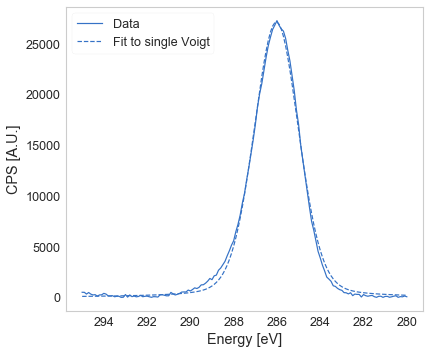

In [401]:
sput1 = experiments[2]
sput1 = subtract_shirley_bg(sput1, 'C_1s')
plt.clf()
# fit_voigt_gauss(sput1.dfx['C_1s'], par_g=[287, 1, 2e4], bounds_g=[(286, 292), (0.8, 1.8), (1e3, 5e3)], ax = ax);
fitv = fit_voigt(sput1, 'C_1s')#, par_g=[287, 1, 2e4], bounds_g=[(286, 292), (0.8, 1.8), (1e3, 5e3)], ax = ax);
cosmetics_plot()

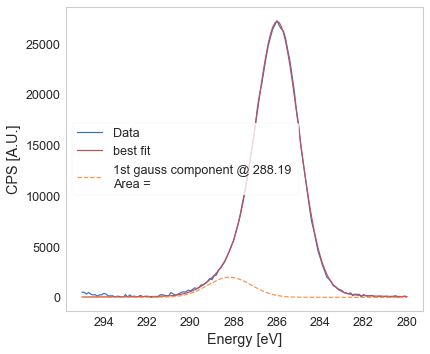

In [404]:
par_g=[2e4, 287, 1]
bounds_g=[ (1e3, 5e3), (286, 292), (0.8, 1.8)]
fitvg = add_gauss_shoulder(xp = sput1, region='C_1s', par_g=par_g, bounds_g=bounds_g, fitv=fitv)

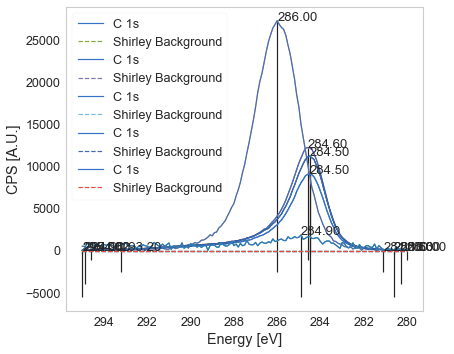

In [405]:
region = 'C_1s'
for i, xp in enumerate(experiments):
    xp = subtract_shirley_bg(xp, region, )

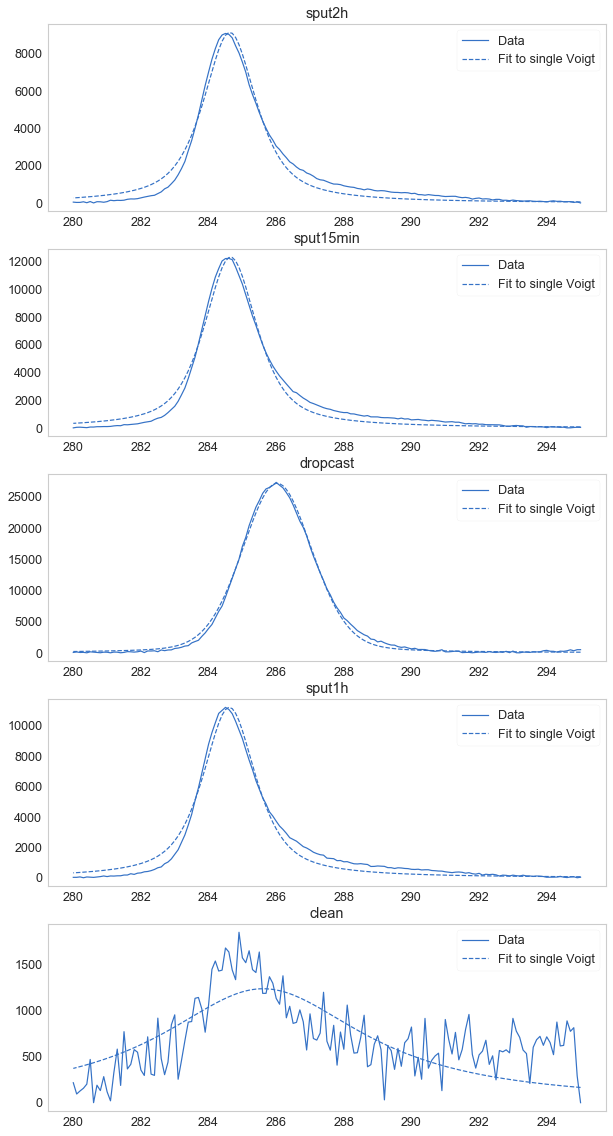

In [377]:
fig, ax = plt.subplots(len(experiments), figsize=(10, 20))
for i, xp in enumerate(experiments):
    fit_voigt(xp, region, ax=ax[i])
    ax[i].set_title(xp.name)

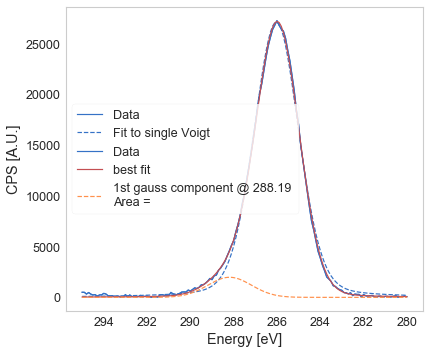

In [407]:
fitv = fit_voigt(sput1, 'C_1s')
fitvg = add_gauss_shoulder(xp = sput1, region='C_1s', par_g=par_g, bounds_g=bounds_g, fitv=fitv)

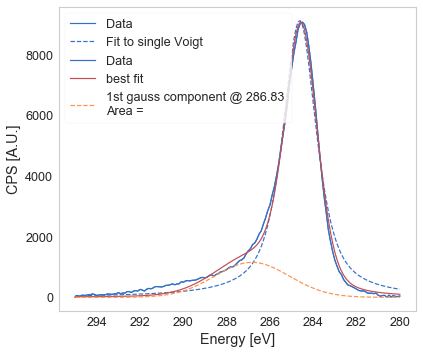

In [415]:
sput2 = experiments[0]
fitv = fit_voigt(sput2, 'C_1s')
par_g=[2e4, 287, 1]
bounds_g=[ (1e3, 5e3), (286, 292), (0.8, 1.8)]
fitvg = add_gauss_shoulder(xp = sput2, region='C_1s', par_g=par_g, bounds_g=bounds_g, fitv=fitv, flag_plot=True)

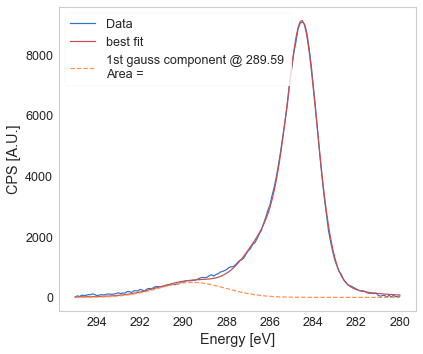

In [416]:
par_g=[1e4, 290, 1.2]
bounds_g=[ (500, 2e3), (289, 292), (0.8, 2.5)]
fitvgg = add_gauss_shoulder(xp = sput2, region='C_1s', par_g=par_g, bounds_g=bounds_g, fitv=fitvg, Ng=2)

In [ ]:
x[ind]

### The background from Ba 3d 3/2 was not subtracted -> Separate peaks

In [12]:
dfBa3d_32 = dfdrop.Ba_3d [ dfdrop.Ba_3d.energy > 790 ]
y32 = subtract_shirley_bg(dfBa3d_32)

NameError: name 'dfdrop' is not defined

In [ ]:
dfref_32 = dfclean.Ba_3d [ dfclean.Ba_3d.energy > 790 ]
y32bg = subtract_linear_bg(dfref_32)

In [13]:
from scipy.ndimage.filters import gaussian_filter1d 
x = dfBa3d_32.energy.values

y32 = gaussian_filter1d(y32, sigma = 2)
y32bg = gaussian_filter1d(y32bg, sigma = 2)

step = x[0] - x[1]
area_ratio = np.trapz(y32, dx = step) / np.trapz(y32bg, dx = -step)
print(area_ratio)

plt.plot(x, y32, label='Dropcasting test')
plt.plot(x, y32bg, label='Reference intensity, Au clean')

plt.title('Ba 3d 3/2')

cosmetics_plot()

NameError: name 'dfBa3d_32' is not defined

## Compare to C abundance

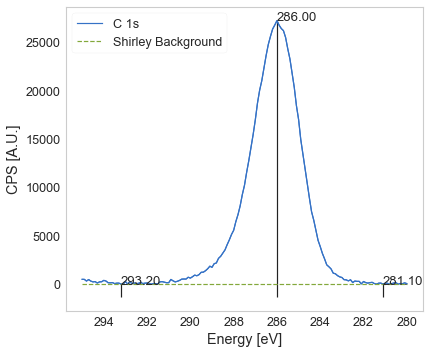

In [17]:
yC = subtract_shirley_bg(experiments[0], 'C_1s', maxit=20)

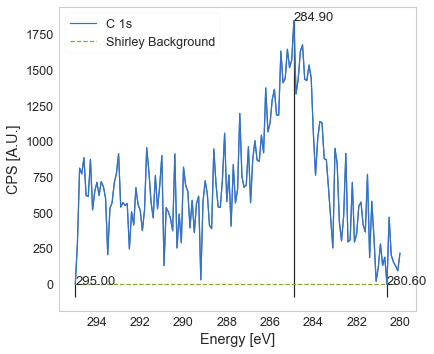

In [18]:
yCref = subtract_shirley_bg(experiments[1], 'C_1s', maxit=20)

7.051082058539533


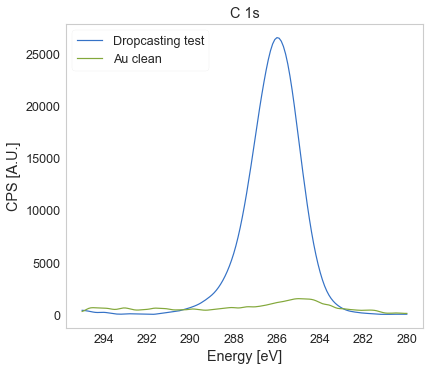

In [19]:
from scipy.ndimage.filters import gaussian_filter1d 
x = experiments[0].dfx.C_1s.dropna().energy.values
# yCref = dfclean.C_1s.dropna().counts.values - np.average(yCref)
yC = gaussian_filter1d(yC.dfx.C_1s.dropna().counts, sigma = 2)
yCref = gaussian_filter1d(yCref.dfx.C_1s.dropna().counts, sigma = 2)

step = x[0] - x[1]
area_ratio = np.trapz(yC, dx = step) / np.trapz(yCref, dx = step)
print(area_ratio)

plt.plot(x, yC, label='Dropcasting test')
plt.plot(x, yCref, label='Au clean')
plt.title('C 1s')

cosmetics_plot()

# Arrange Class Region analysis

In [15]:
class XPSana(XPSImport):
    """Analysis methods for XPS spectra"""
    def __init__(self, path):
        super().__init__(path)
        self.df = XPSImport.import_xps_df(self)
    
    def cosmetics_plot(self, ax = None):
        if ax == None: ax = plt.gca()
        ax.invert_xaxis()
        ax.legend()
        ax.set_xlabel('Energy [eV]')
        ax.set_ylabel('CPS [A.U.]')

    def plot_region(self, region : str, lb : str = None):
        
        if lb == None: lb = region.replace('_', ' ')
            
        p1 = plt.plot(self.df[region].energy, self.df[region].counts, label=lb)
        self.cosmetics_plot()
        return p1[0]
        
    def scale_df(self, scale_factor):
    
        names = list(self.df.columns.levels[0])
        dfnew = pd.DataFrame()

        frames = []
        for n in names:
            x = self.df[n].counts.apply(lambda c : c * scale_factor)
            frames.append( pd.DataFrame([self.df[n].energy, x]).T )
        dfnew = pd.concat(frames, axis=1)

        mi = pd.MultiIndex.from_product([names, np.array(['energy', 'counts'])])
        mi.to_frame()
        dfnew.columns = mi
        self.df = dfnew
        
    def reverse_energy_scale(self):
        """Transform energy scale from kinetic to binding"""
        def excitation_energy_metadata(name : str):
            """Find the excitation energy for a region in XPS '.xy' file
            Parameters:
            path : str 
                Absolute path to file to search into
            name : str
                Name of the region with underscores"""

            with open(self.path) as infile:
                for i, line in enumerate(infile):
                    if name.replace('_', ' ') in line:
                        chunk = infile.readlines(800)
        #                 print(chunk)
                        for li in chunk:
                            if '# Excitation Energy: ' in li:
                                hv = li[21:-1]
                                return float(hv)
                print('Region %s not found' %name)

        names = list(self.df.columns.levels[0])
        dfnew = pd.DataFrame()

        frames = []

        for n in names:    # Loop over regions
            hv = excitation_energy_metadata(n)    # Find excitation energy from file data
            x = self.df[n].energy.dropna().apply(lambda E : hv - E)  # Subtract hv from KE to yield binding energy
            frames.append( pd.DataFrame([x, self.df[n].counts]).T )
        dfnew = pd.concat(frames, axis=1)

        mi = pd.MultiIndex.from_product([names, np.array(['energy', 'counts'])])
        mi.to_frame()
        dfnew.columns = mi
        self.df = dfnew

    def check_arrays(self, x, y):
        # Make sure we've been passed arrays and not lists.
        x = np.array(x)
        y = np.array(y)
        # Sanity check: Do we actually have data to process here?
        if not (x.any() and y.any()):
            print ("specs.shirley_calculate: One of the arrays x or y is empty. Returning zero background.")
            #return zeros(x.shape)

        # Next ensure the energy values are *decreasing* in the array,
        # if not, reverse them.
        if x[0] < x[-1]:
            is_reversed = True
            x = x[::-1]
            y = y[::-1]
            return x, y, is_reversed
        else:
            is_reversed = False
            return x, y, is_reversed

    def find_integration_limits(self, x, y, flag_plot = False, region : str = None):
        # Locate the biggest peak.
        maxidx = abs(y - np.max(y)).argmin()

        # It's possible that maxidx will be 0 or -1. If that is the case,
        # we can't use this algorithm, we return a zero background.
        if maxidx == 0 or maxidx >= len(y) - 1:
            print ("specs.shirley_calculate: Boundaries too high for algorithm: returning a zero background.")

        # Locate the minima either side of maxidx.
        lmidx = abs(y[0:maxidx] - np.min(y[0:maxidx])).argmin()
        rmidx = abs(y[maxidx:] - np.min(y[maxidx:])).argmin() + maxidx

        if flag_plot:
            plt.plot(x, y, 'b-', label=region.replace('_', ' '))
            ybase = plt.ylim()[0]
            ind = [maxidx, lmidx, rmidx]
            for i in ind:
                plt.vlines(x = x[i], ymin=ybase, ymax=y[i], color='k')
                plt.text(s= '%.2f'%x[i], x = x[i], y = y[i])
            
        return lmidx, rmidx

    def shirley_loop(self, x, y,
                     lmidx : int = None,
                     rmidx : int = None,
                     maxit : int = 10, tol : float = 1e-5,
                     DEBUG : bool = False):
        # Initial value of the background shape B. The total background S = yr + B,
        # and B is equal to (yl - yr) below lmidx and initially zero above.

        x, y, is_reversed = self.check_arrays(x, y)
        
        if (lmidx == None) or (rmidx == None):
            lmidx, rmidx = self.find_integration_limits(x, y, flag_plot=False)
        xl, yl = x[lmidx], y[lmidx]
        xr, yr = x[rmidx], y[rmidx]
        
        B = np.zeros(x.shape)
        B[:lmidx] = yl - yr
        Bnew = B.copy()
        it = 0
        while it < maxit:
            if DEBUG:
                print ("Shirley iteration: %i" %it)

            # Calculate new k = (yl - yr) / (int_(xl)^(xr) J(x') - yr - B(x') dx')
            ksum = np.trapz( + B[lmidx:rmidx - 1] + yr - y[lmidx:rmidx - 1] , x=x[lmidx:rmidx - 1])
            k = (yl - yr) / ksum

            # Calculate new B
            ysum = 0
            for i in range(lmidx, rmidx):
                ysum = np.trapz( B[i:rmidx - 1] + yr - y[i:rmidx - 1] , x=x[i:rmidx - 1])
                Bnew[i] = k * ysum

            # If Bnew is close to B, exit.
            if np.linalg.norm(Bnew-B) < tol:
                B = Bnew.copy()
                break
            else:
                B = Bnew.copy()
            it += 1

        if it >= maxit:
            print("specs.shirley_calculate: Max iterations exceeded before convergence.")
        if is_reversed:
            return ((yr + B)[::-1])
        else:
            return (yr + B)

    def subtract_shirley_bg(self, region, maxit : int = 10, lb : str = None):
        """Plot region and shirley background. Decorator for shirley_loop function"""
        x, y = self.df[region].dropna().energy.values, self.df[region].dropna().counts.values

        if lb == None : lb = region.replace('_', ' ')
        p1 = plt.plot(x, y, label=lb)
        col = p1[0].get_color()
        
        self.find_integration_limits(x, y, flag_plot=True, region = region)
        ybg = self.shirley_loop(x, y, maxit = maxit)
        
        plt.plot(x, ybg, '--', color = col, label='Shirley Background')
        self.cosmetics_plot()
        
        dfnew = pd.DataFrame({'energy' : self.df[region].energy.dropna(), 'counts' : y - ybg})
        self.df[region] = dfnew

    def subtract_double_shirley(self, region : str, xlim : float, maxit : int = 10):
        """Shirley bg subtraction for double peak"""
        x = self.df[region].dropna().energy
        y = self.df[region].dropna().counts
        plt.plot(x, y, label=region.replace('_', ' '))
        
        y1 = y[ x > xlim ]
        x1 = x[ x > xlim ]
        y2 = y[ x <= xlim ]
        x2 = x[ x <= xlim ]

        ybg1 = self.shirley_loop(x1, y1, maxit = maxit)
        ybg2 = self.shirley_loop(x2, y2, maxit = maxit)

        plt.plot(x, np.append(ybg1, ybg2), label='Double shirley bg')
        y = np.append( y1 - ybg1, y2 - ybg2)
        self.cosmetics_plot()

        dfnew = pd.DataFrame({'energy' : x, 'counts' : y})
        self.df[region] = dfnew

    def subtract_linear_bg (self, region, lb : str = None) -> np.array:
        """Fit background to line and subtract from data"""

        from scipy import stats, polyval
        x = self.df[region].dropna().energy.values
        y = self.df[region].dropna().counts.values
        if lb == None : lb = region.replace('_', ' ')
        p1 = plt.plot(x, y, label=lb)
        col = p1[0].get_color()
        
        slope, intercept, r, p_val, std_err = stats.linregress(x, y)
        ybg = polyval([slope, intercept], x);
        plt.plot(x, ybg, '--', color=col, label='Linear Background')
        self.cosmetics_plot()
        
        dfnew = pd.DataFrame({'energy' : self.df[region].energy.dropna(), 'counts' : y - ybg})
        self.df[region] = dfnew
        
    def gaussian_smooth(self, region, sigma : int = 2) -> pd.DataFrame:
        from scipy.ndimage.filters import gaussian_filter1d 

        y = gaussian_filter1d(self.df[region].dropna().counts.values, sigma = 2)
        dfnew = pd.DataFrame({'energy' : self.df[region].energy.dropna(), 'counts' : y})
        self.df[region] = dfnew
        
    from scipy.optimize import curve_fit
    def gauss(self, x, *p):
        A, mu, sigma = p
        return A *  np.exp(-( x-mu )**2 / (2.*sigma**2))

    def double_gauss(self, x, *p):
        return self.gauss(x, *p[:3]) + self.gauss(x, *p[3:])

    def fit_double_gauss(self, region : str, thres0 : float = 0.5):
        """Fit to double gauss, estimate loc and scale from peak finding"""
        
        p1 = self.plot_region(region, lb=region)
        col = p1.get_color()
        x = self.df[region].dropna().energy.values
        y = self.df[region].dropna().counts.values
        def compute_p0_peaks(x, y, thres0) -> list:
            peaks = peakutils.indexes(y, thres = thres0, min_dist=10)
            while len(peaks) > 2:
                thres0 += 0.05
                peaks = peakutils.indexes(y, thres = thres0, min_dist=10)
            while len(peaks) < 2:
                thres0 -= 0.05
                peaks = peakutils.indexes(y, thres = thres0, min_dist=10)
            p0 = [y[peaks[0]], x[peaks[0]], 2, y[peaks[1]], x[peaks[1]], 2]
            return p0

        p0 = compute_p0_peaks(x, y, thres0)
        fit, cov = curve_fit(self.double_gauss, xdata = x , ydata= y, p0=p0)

        plt.plot(x, self.double_gauss(x, *fit), '--', color=col, label='Double gauss fit')

        plt.text(s='%.1f'%fit[1], x=fit[1], y=fit[0]*1.1)
        plt.text(s='%.1f'%fit[4], x=fit[4], y=fit[3]*1.05)
        yl = plt.ylim()
        plt.ylim(yl[0], yl[1]*1.5)
        self.cosmetics_plot()

        return fit[1], fit[4]
    
    def fit_gauss(self, region : str, thres0 : float = 0.7):
        """Fit to gauss, estimate loc and scale from peak finding"""
        
        p1 = self.plot_region(region, lb=region)
        col = p1.get_color()
        x = self.df[region].dropna().energy.values
        y = self.df[region].dropna().counts.values
        
        def compute_p0_peaks(x, y, thres0) -> list:
            peaks = peakutils.indexes(y, thres = thres0, min_dist=10)
            while len(peaks) > 1:
                thres0 += 0.05
                peaks = peakutils.indexes(y, thres = thres0, min_dist=10)
            while len(peaks) < 1:
                thres0 -= 0.05
                peaks = peakutils.indexes(y, thres = thres0, min_dist=10)
            p0 = [y[peaks[0]], x[peaks[0]], 2]
            return p0

        p0 = compute_p0_peaks(x, y, thres0)
        fit, cov = curve_fit(self.gauss, x, y, p0=p0)

        plt.plot(x, self.gauss(x, *fit), '--', color=col, label='Gauss fit')

        plt.text(s='%.1f'%fit[1], x=fit[1], y=fit[0]*1.1)
        yl = plt.ylim()
        plt.ylim(yl[0], yl[1]*1.5)
        self.cosmetics_plot()

        return fit

NameError: name 'XPSImport' is not defined

### Test it

In [16]:
drop = XPSana(path = file_dropcast)#, region = 'C_1s')
drop.plot_region('Cl_2p')

drop.gaussian_smooth('Cl_2p', sigma=3)
drop.plot_region('Cl_2p', 'Gaussian smooth')
plt.gca().invert_xaxis()

NameError: name 'XPSana' is not defined

In [ ]:
drop.subtract_linear_bg('Cl_2p')

In [ ]:
drop.__init__(path = file_dropcast)
drop.gaussian_smooth('Cl_2p')
drop.subtract_shirley_bg('Cl_2p', maxit = 20)

In [ ]:
drop.plot_region('Cl_2p')

# Peak position analysis

### Background subtraction

In [17]:
clean = XPSana(path = file_clean)
clean.reverse_energy_scale()
clean.scale_df( scale_factor = 1/6 )

NameError: name 'XPSana' is not defined

In [ ]:
drop = XPSana(path = file_dropcast)#, region = 'C_1s')
drop.gaussian_smooth('Ba_3d')
# drop.plot_region('Ba_3d')
drop.subtract_double_shirley('Ba_3d', 789.2)

### Double Gauss fit

In [18]:
drop.fit_double_gauss('Ba_3d', thres0 = 0.7)

NameError: name 'drop' is not defined

### Single Gauss: C 1s

In [19]:
drop = XPSana(path = file_dropcast)

# drop.gaussian_smooth('C_1s')
drop.subtract_shirley_bg('C_1s')
drop.fit_gauss('C_1s')

NameError: name 'XPSana' is not defined

# Dev

## Modules (last copy on 21.01.2020)

In [6]:
path = '/Users/pabloherrero/sabat/xps_spectra/'
file800_20 = path + '2019_10_10_FBI_Au_mica/20191010_FBI_20puls_1uM_Au.xy'
file800_40 = path + '2019_10_10_FBI_Au_mica/20191010_FBI_40puls_1uM_Au.xy'
# file800_120 = path + '2019_10_10_FBI_Au_mica/20191010_FBI_20puls_1uM_Au'
file800_ref = path + '2019_10_10_AcN_Au_mica/20191010_Au_111_clean.xy'

In [55]:
from dataclasses import dataclass
def find_groups(path : str):
    """Utility to find number of groups contained in file"""
    groupCount = 0
    with open(path) as infile:
        for i,line in enumerate(infile):
            if '# Group:' in line :
                groupCount += 1
    return groupCount

def xy_region_delimiters(path: str) -> tuple:
    """Retrieve position, name and number of lines of each spectrum in a .xy file"""

    skipRows0 = []
    nrows0 = []
    names = []

    with open(path) as infile:
        for i,line in enumerate(infile):
            if '# ColumnLabels: energy' in line:
                skipRows0.append(i)
            if '# Region:' in line:
                names.append(line[21:-1].replace(' ', '_'))
            if '# Values/Curve:' in line:
                nrows0.append(int(line[21:-1]))
    return (skipRows0, nrows0, names)

def import_xps_df(path: str) -> pd.DataFrame:
    """Join all spectra in an xps .xy file, each region contains a column with energy [in eV] and count values"""

    skipRows0, nrows0, names = xy_region_delimiters(path) # there are len(skipRows0) - 1 regions in the file

    frames = []
    for j, re in enumerate(skipRows0):
        if j < len(skipRows0):
            frames.append(pd.read_table(path, sep='\s+', skiprows=re+2, nrows = nrows0[j], header=None, names=[names[j], 'counts'],
                                        decimal='.', encoding='ascii', engine='python'))

    dfx = pd.concat(frames, axis=1)

    index2 = np.array(['energy', 'counts'])
    mi = pd.MultiIndex.from_product([names, index2], names=['range', 'properties'])
    mi.to_frame()
    dfx.columns = mi

    return dfx
        
def excitation_energy_metadata(path : str , name : str):
        """Find the excitation energy for a region in XPS '.xy' file
        Parameters:
        path : str 
            Absolute path to file to search into
        name : str
            Name of the region with underscores"""

        with open(path) as infile:
            for i, line in enumerate(infile):
                if name.replace('_', ' ') in line:
                    chunk = infile.readlines(800)
    #                 print(chunk)
                    for li in chunk:
                        if '# Excitation Energy: ' in li:
                            hv = li[21:-1]
                            return float(hv)
            print('Region %s not found' %name)

def ke_to_be(dfx : pd.DataFrame, hv : float) -> pd.DataFrame:
    """Transform energy scale from kinetic to binding"""
    names = list(dfx.columns.levels[0])
    dfnew = pd.DataFrame()

    frames = []
    for n in names:    # Loop over regions
        x = dfx[n].energy.dropna().apply(lambda E : hv - E)  # Subtract hv from KE to yield binding energy
        frames.append( pd.DataFrame([x, dfx[n].counts]).T )
    dfnew = pd.concat(frames, axis=1)

    mi = pd.MultiIndex.from_product([names, np.array(['energy', 'counts'])])
    mi.to_frame()
    dfnew.columns = mi
    return dfnew

def check_arrays(dfr) -> bool:
    """Check whether file is in BE or KE scale"""
    x, y = dfr.dropna().energy.values, dfr.dropna().counts.values
    # Next ensure the energy values are *decreasing* in the array,
    if x[0] < x[-1]:
        is_reversed = True
        return is_reversed
    else:
        is_reversed = False
        return is_reversed  

@dataclass 
class XPS_experiment:
    """XPS dataclass with regions dfx and metadata
    Attrs:
    -------
    dfx : pd.DataFrame
        table containing all regions found in .xy file
    delimiters : tuple
        position, extension and name of each region to correctly import dfx
    name : str = None
        short name to reference the experiment
    label : str = None
        longer description of the experiment (cleaning, preparation conditions...)
    date : str = None
        experiment date as read in the filename
    other_meta : str = None
        other info contained in the filename
    """
    dfx : pd.DataFrame
    delimiters : tuple
    name : str = None
    label : str = None
    date : str = None
    other_meta : str = None
        
def xps_data_import(path : str, name : str = None, label : str = None) -> XPS_experiment:
    """Method to arrange a XPS_experiment data"""
    dfx = import_xps_df(path)
    delimiters = xy_region_delimiters(path)

    if check_arrays(dfx[delimiters[2][0]]):
        hv = excitation_energy_metadata(path, delimiters[2][0])
        dfx = ke_to_be(dfx, hv)
        
    relpath, filename = os.path.split(path)
    dir_name = os.path.split(relpath)[1]
    da = re.search('\d+_', filename).group(0).replace('/', '').replace('_', '')
    date = re.sub('(\d{4})(\d{2})(\d{2})', r"\1.\2.\3", da, flags=re.DOTALL)
    other_meta = dir_name + filename.replace(da, '')
    other_meta
    return XPS_experiment(dfx = dfx, delimiters = delimiters, name = name, label = label, date = date, other_meta = other_meta)

In [34]:
from copy import deepcopy

In [50]:
def scale_dfx(xp : XPS_experiment, scale_factor : float, inplace : bool = False):
    """Rescale xp.dfx for comparison with other experiment
    Returns whole XPS_experiment"""
    names = list(xp.dfx.columns.levels[0])
    dfnew = pd.DataFrame()

    frames = []
    for n in names:
        x = xp.dfx[n].counts.apply(lambda c : c * scale_factor)
        frames.append( pd.DataFrame([xp.dfx[n].energy, x]).T )
    dfnew = pd.concat(frames, axis=1)

    mi = pd.MultiIndex.from_product([names, np.array(['energy', 'counts'])])
    mi.to_frame()
    dfnew.columns = mi
    
    if inplace:
        xp.dfx = dfnew
        return xp
    else:
        xpNew = deepcopy(xp)
        xpNew.dfx = dfnew
    return xpNew

def find_integration_limits(x, y, flag_plot = False, region : str = None):
    """Utility to locate limits for shirley bg subtraction"""
    # Locate the biggest peak.
    maxidx = abs(y - np.max(y)).argmin()

    # It's possible that maxidx will be 0 or -1. If that is the case,
    # we can't use this algorithm, we return a zero background.
    if maxidx == 0 or maxidx >= len(y) - 1:
        print ("specs.shirley_calculate: Boundaries too high for algorithm: returning a zero background.")

    # Locate the minima either side of maxidx.
    lmidx = abs(y[0:maxidx] - np.min(y[0:maxidx])).argmin()
    rmidx = abs(y[maxidx:] - np.min(y[maxidx:])).argmin() + maxidx

    if flag_plot:
        plt.plot(x, y, 'b-', label=region.replace('_', ' '))
        ybase = plt.ylim()[0]
        ind = [maxidx, lmidx, rmidx]
        for i in ind:
            plt.vlines(x = x[i], ymin=ybase, ymax=y[i], color='k')
            plt.text(s= '%.2f'%x[i], x = x[i], y = y[i])

    return lmidx, rmidx

def shirley_loop(x, y,
                 lmidx : int = None,
                 rmidx : int = None,
                 maxit : int = 10, tol : float = 1e-5,
                 DEBUG : bool = False):
    # Initial value of the background shape B. The total background S = yr + B,
    # and B is equal to (yl - yr) below lmidx and initially zero above.

#     x, y, is_reversed = check_arrays(x, y)

    if (lmidx == None) or (rmidx == None):
        lmidx, rmidx = find_integration_limits(x, y, flag_plot=False)
    xl, yl = x[lmidx], y[lmidx]
    xr, yr = x[rmidx], y[rmidx]

    B = np.zeros(x.shape)
    B[:lmidx] = yl - yr
    Bnew = B.copy()
    it = 0
    while it < maxit:
        if DEBUG:
            print ("Shirley iteration: %i" %it)

        # Calculate new k = (yl - yr) / (int_(xl)^(xr) J(x') - yr - B(x') dx')
        ksum = np.trapz( + B[lmidx:rmidx - 1] + yr - y[lmidx:rmidx - 1] , x=x[lmidx:rmidx - 1])
        k = (yl - yr) / ksum

        # Calculate new B
        ysum = 0
        for i in range(lmidx, rmidx):
            ysum = np.trapz( B[i:rmidx - 1] + yr - y[i:rmidx - 1] , x=x[i:rmidx - 1])
            Bnew[i] = k * ysum

        # If Bnew is close to B, exit.
        if np.linalg.norm(Bnew-B) < tol:
            B = Bnew.copy()
            break
        else:
            B = Bnew.copy()
        it += 1

    if it >= maxit:
        print("specs.shirley_calculate: Max iterations exceeded before convergence.")
#     if is_reversed:
#         return ((yr + B)[::-1])
    else:
        return (yr + B)

def subtract_shirley_bg(xp : XPS_experiment, region : str, maxit : int = 10, lb : str = None) -> XPS_experiment:
    """Plot region and shirley background. Decorator for shirley_loop function"""
    x, y = xp.dfx[region].dropna().energy.values, xp.dfx[region].dropna().counts.values
    col = plot_region(xp, region, lb=region).get_color()

    find_integration_limits(x, y, flag_plot=True, region = region)
    ybg = shirley_loop(x, y, maxit = maxit)

    plt.plot(x, ybg, '--', color=col, label='Shirley Background')
    cosmetics_plot()

    dfnew = pd.DataFrame({'energy' : x, 'counts' : y - ybg})
    xpNew = deepcopy(xp)
    xpNew.dfx[region] = dfnew
    return xpNew

def subtract_double_shirley(xp : XPS_experiment, region : str, xlim : float, maxit : int = 10, label : str = None) -> XPS_experiment:
    """Shirley bg subtraction for double peak"""
    x, y = xp.dfx[region].dropna().energy.values, xp.dfx[region].dropna().counts.values
    col = plot_region(xp, region, lb=region).get_color()

    y1 = y[ x > xlim ]
    x1 = x[ x > xlim ]
    y2 = y[ x <= xlim ]
    x2 = x[ x <= xlim ]

    ybg1 = shirley_loop(x1, y1, maxit = maxit)
    ybg2 = shirley_loop(x2, y2, maxit = maxit)

    plt.plot(x, np.append(ybg1, ybg2), label='Double shirley bg')
    y12 = np.append( y1 - ybg1, y2 - ybg2)

    dfnew = pd.DataFrame({'energy' : x, 'counts' : y12})
    xpNew = deepcopy(xp)
    xpNew.dfx[region] = dfnew
    return xpNew

def subtract_linear_bg (xp : XPS_experiment, region, lb : str = None) -> XPS_experiment:
    """Fit background to line and subtract from data"""

    from scipy import stats, polyval
    x = xp.dfx[region].dropna().energy.values
    y = xp.dfx[region].dropna().counts.values
    col = plot_region(xp, region, lb=region).get_color()

    slope, intercept, r, p_val, std_err = stats.linregress(x, y)
    ybg = polyval([slope, intercept], x);
    plt.plot(x, ybg, '--', color=col, label='Linear Background')

    dfnew = pd.DataFrame({'energy' : self.df[region].energy.dropna(), 'counts' : y - ybg})
    xpNew = deepcopy(xp)
    xpNew.dfx[region] = dfnew
    return xpNew

def gaussian_smooth(xp : XPS_experiment, region, sigma : int = 2) -> XPS_experiment:
    from scipy.ndimage.filters import gaussian_filter1d 

    y = gaussian_filter1d(xp.dfx[region].dropna().counts.values, sigma = 2)
    dfnew = pd.DataFrame({'energy' : xp.dfx[region].energy.dropna(), 'counts' : y})
    xpNew = deepcopy(xp)
    xpNew.dfx[region] = dfnew
    return xpNew

def gauss(x, *p):
    A, mu, sigma = p
    return A *  np.exp(-( x-mu )**2 / (2.*sigma**2))

def double_gauss(x, *p):
    return gauss(x, *p[:3]) + gauss(x, *p[3:])

def compute_p0_peaks(x : np.array, y : np.array, thres0 : float, Npeaks : int) -> list:
    """Rough first estimation of fit parameters p0 from peak search"""
    
    peaks = peakutils.indexes(y, thres = thres0, min_dist=10)
    while len(peaks) > Npeaks:
        thres0 += 0.05
        peaks = peakutils.indexes(y, thres = thres0, min_dist=10)
    while len(peaks) < Npeaks:
        thres0 -= 0.05
        peaks = peakutils.indexes(y, thres = thres0, min_dist=10)
    
    p0 = []
    for i in range(Npeaks):
        xmax, ymax = x[peaks[i]], y[peaks[i]]
        p0.append(ymax)
        p0.append(xmax)
        p0.append(x[y > ymax/2][0] - xmax)    
    return p0
    
def fit_double_gauss(xp : XPS_experiment, region : str, thres0 : float = 0.5):
    """Fit to double gauss, estimate loc and scale from peak finding"""

    col = plot_region(xp, region, lb=region).get_color()
    x = xp.dfx[region].dropna().energy.values
    y = xp.dfx[region].dropna().counts.values

    p0 = compute_p0_peaks(x, y, thres0, Npeaks=2)
    fit, cov = curve_fit(double_gauss, xdata = x , ydata= y, p0=p0)

    plt.plot(x, double_gauss(x, *fit), '--', color=col, label='Double gauss fit')

    plt.text(s='%.1f'%fit[1], x=fit[1], y=fit[0]*1.1)
    plt.text(s='%.1f'%fit[4], x=fit[4], y=fit[3]*1.05)
    yl = plt.ylim()
    plt.ylim(yl[0], yl[1]*1.5)

    return fit[1], fit[4]

def fit_gauss(xp : XPS_experiment, region : str, thres0 : float = 0.7):
    """Fit to gauss, estimate loc and scale from peak finding"""

    col = plot_region(xp, region, lb=region).get_color()
    x = xp.dfx[region].dropna().energy.values
    y = xp.dfx[region].dropna().counts.values

    p0 = compute_p0_peaks(x, y, thres0, 1)
    fit, cov = curve_fit(self.gauss, x, y, p0=p0)

    plt.plot(x, self.gauss(x, *fit), '--', color=col, label='Gauss fit')

    plt.text(s='%.1f'%fit[1], x=fit[1], y=fit[0]*1.1)
    yl = plt.ylim()
    plt.ylim(yl[0], yl[1]*1.5)
    self.cosmetics_plot()

    return fit

def plot_region(xp : XPS_experiment, region : str, lb : str = None):
    """Quick region plotter"""
    if lb == None: lb = xp.name + region

    p1 = plt.plot(xp.dfx[region].energy, xp.dfx[region].counts, label=lb)
    cosmetics_plot()
    return p1[0]

def cosmetics_plot(ax = None):
    if ax == None: ax = plt.gca()
    ax.invert_xaxis()
    ax.legend()
    ax.set_xlabel('Energy [eV]')
    ax.set_ylabel('CPS [A.U.]')

## Tests

In [36]:
Xperiment = xps_data_import(file800_ref)
region = 'C_1s'

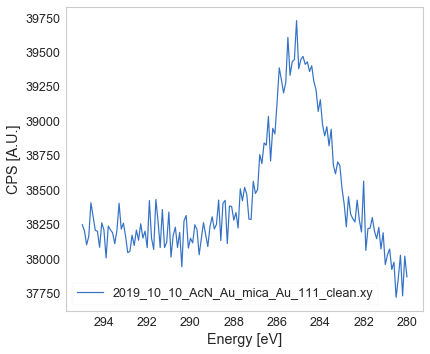

In [37]:
plot_region(Xperiment, region)

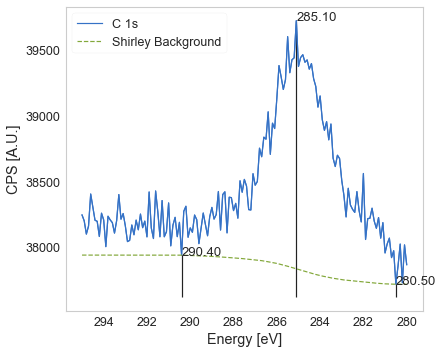

In [38]:
# dfx = Xperiment.dfx
xp_bg = subtract_shirley_bg(Xperiment, 'C_1s', maxit=30)

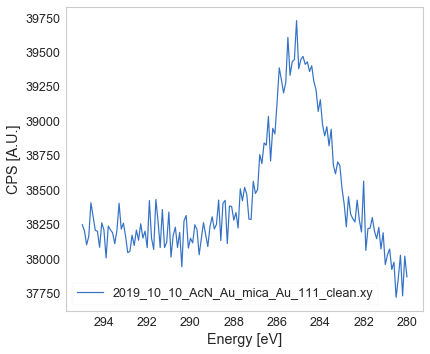

In [40]:
plot_region(Xperiment, region)

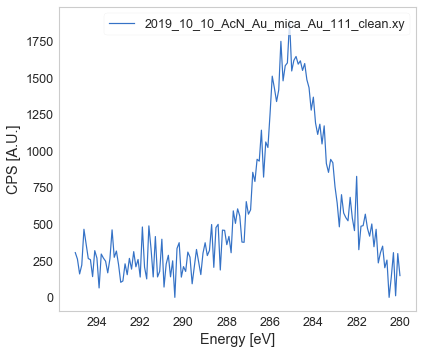

In [39]:
plot_region(xp_bg, region)

## Tests double peak

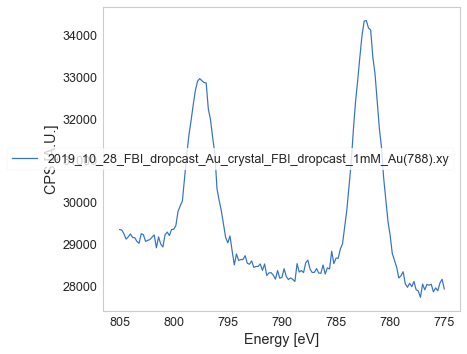

In [53]:
file_dropcast = '/Users/pabloherrero/sabat/xps_spectra/2019_10_28_FBI_dropcast_Au_crystal/20191028_FBI_dropcast_1mM_Au(788).xy'
xp_double = xps_data_import(file_dropcast)
plot_region(xp_double, 'Ba_3d')

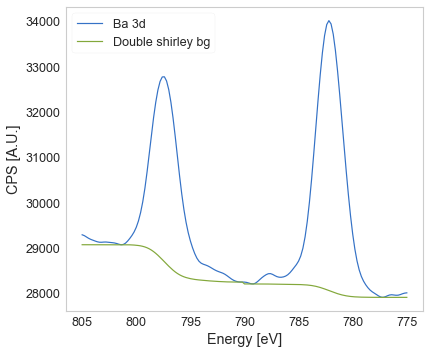

In [52]:
xp_smooth = gaussian_smooth(xp_double, 'Ba_3d')
xp_bg = subtract_double_shirley(xp_smooth, 'Ba_3d', 790)

(797.3519669505791, 782.1363388321132)

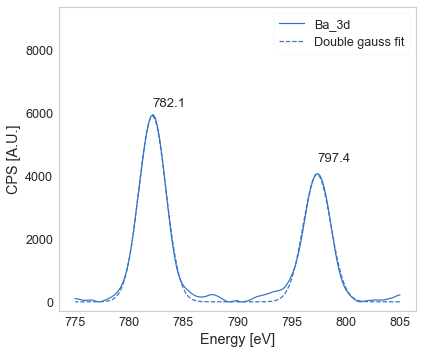

In [54]:
fit_double_gauss(xp_bg, 'Ba_3d', thres0=0.5, )

In [ ]:
def test_compute_p0_peaks():
    sample_file = '/Users/pabloherrero/sabat/xps_spectra/2019_10_28_FBI_dropcast_Au_crystal/20191028_FBI_dropcast_1mM_Au(788).xy'
    xp_double = xps_data_import(sample_file)
    x, y = xp_bg.dfx.Ba_3d.dropna().energy.values, xp_bg.dfx.Ba_3d.dropna().counts.values
    p0 = compute_p0_peaks(x, y, thres0 = 0.5, Npeaks=2)
    assert len(p0) == 6, "The sample data should yield 2 peaks, i.e. 6 fit params."
test_compute_p0_peaks()
    
def test_fit_double_gauss():
    sample_file = '/Users/pabloherrero/sabat/xps_spectra/2019_10_28_FBI_dropcast_Au_crystal/20191028_FBI_dropcast_1mM_Au(788).xy'
    xp_double = xps_data_import(sample_file)
    xp_smooth = gaussian_smooth(xp_double, 'Ba_3d');
    xp_bg = subtract_double_shirley(xp_smooth, 'Ba_3d', 790);
    fitp = fit_double_gauss(xp_bg, 'Ba_3d', thres0=0.5)
    plt.clf();
    assert int(fitp[0]) == 797, "Incorrect position of the Ba 3d 3/2 peak "
    assert int(fitp[1]) == 782, "Incorrect position of the Ba 3d 5/2 peak "
    
test_fit_double_gauss()